### Process mining trail started

In [1]:
import pandas as pd
import json
rfp = pd.read_csv(r"E:\Process_Mining\Input_Files_(1MonthData)\003 RFP Monitoring Report (5).csv", encoding='utf-8', low_memory=False)
ji_register = pd.read_csv(r"E:\Process_Mining\Input_Files_(1yearData)\JI REGISTER 202324.csv", encoding='utf-8', low_memory=False)

In [2]:
rfp = rfp.rename(columns=lambda x : x.strip())
ji_register = ji_register.rename(columns=lambda x : x.strip())

In [3]:
rfp = rfp.astype(str)
ji_register = ji_register.astype(str)

In [4]:
list(ji_register.columns)

['App.Req.Type',
 'JI Number',
 'JI Created Date',
 'Project Category',
 'Client',
 'Client.1',
 'Name',
 'Functional Location',
 'Functional Location.1',
 'Project Description',
 'User Status',
 'Client Name',
 'Date of Approval',
 'Project Type',
 'System Status',
 'Project Number',
 'Approval Yr',
 'Commencement',
 'Created By',
 'Obj.Class',
 'Obj.curr.of the appr',
 'Plant',
 'Plant.1',
 'Plnn.App.Date',
 'Priority',
 'Project Type.1',
 'Req.Comp.Code',
 'Req.Company',
 'Resp.company',
 'Resp.company.1',
 'Resp.Company Code',
 'Resp.Controlling Are',
 'Resp.Pr.Cntr']

In [5]:
list(rfp.columns)

['Tender. #',
 'RFx Code',
 'RFx Title',
 'Current Tender Status',
 'RFx Creation Date',
 'RFQ/RFP',
 'PR SAP Ref',
 'PR Value From RAT',
 'PR Approval/Allocation Date',
 'Project /Facility Ref',
 'Project Name',
 'Tender Created by',
 'Owner Email',
 'Dept / Division',
 'RAT Ref',
 'RAT Creation date',
 'RAT Approval date (Planned)',
 'RAT Approval date (Actual)',
 'Number of Days for RAT Creation',
 'EOI RFeference_number',
 'EOI issuance Date',
 'Number/List of EOI issued',
 'EOI Closing Date',
 'Number/List of EOI received',
 'ITT/RFP issuance Date',
 'Number/List of ITT/RFP issued',
 'No/List of FoA received',
 'Date of issuance of Response to TQ (Latest)',
 'Planned Tender Submission date as per RAT',
 'Tender Submission date as per ITT',
 'Revised Tender Submission date (Latest)',
 'EoT (Days)',
 'Tender Opening Date-I',
 'Number / List of Tenders received',
 'Number / List of Tenders shortlisted for',
 'Date of issuance of PTC-01',
 'Date of receipt of Revised Tender Submission

In [6]:
rfp['Current Tender Status'].unique()

array(['CANCELLED_EVALUATION', 'PRE_AWARDING', 'INVALIDATED',
       'COMM_EVALUTION', 'TECH_EVALUATION', 'TO_BE_PUBLISHED', 'AWARDED',
       'TO_BE_EVALUATED', 'RUNNING', 'FINAL_EVALUATION'], dtype=object)

In [7]:
# 2. Merge RFP Monitoring Report (left) with JI Register
#    - filter out Invalidated and cancelled evaluations
rfp_filtered = rfp[~rfp['Current Tender Status'].isin(['INVALIDATED', 'CANCELLED_EVALUATION'])]

In [8]:
rfp_filtered['Current Tender Status'].unique()

array(['PRE_AWARDING', 'COMM_EVALUTION', 'TECH_EVALUATION',
       'TO_BE_PUBLISHED', 'AWARDED', 'TO_BE_EVALUATED', 'RUNNING',
       'FINAL_EVALUATION'], dtype=object)

In [9]:
rfp_filtered['Project /Facility Ref'].unique()

array(['P-000424000', 'Various EO Facilities', 'R-000522000', 'Various ',
       'BSD/FMO/121430', 'R-001725000', 'P-001224000',
       'Various 13 Facilities (FM & FC)', 'R-000124000', 'FM-2076', 'nan',
       'FP-1015000034', 'FP-2046000039', 'P-000125000',
       'FP-1001000039-05-12', 'FP-1026000010', 'Q-000125000',
       'S-000223000', 'BSD/FSO/121420/1800011174', 'FM1001 and FM3076',
       'R-002024000', 'FP-2076000022', 'P-000824000', 'FM-2006',
       'P-001125000'], dtype=object)

In [10]:
rfp_filtered.shape

(34, 62)

In [11]:
rfp_filtered['Project /Facility Ref'].unique()

array(['P-000424000', 'Various EO Facilities', 'R-000522000', 'Various ',
       'BSD/FMO/121430', 'R-001725000', 'P-001224000',
       'Various 13 Facilities (FM & FC)', 'R-000124000', 'FM-2076', 'nan',
       'FP-1015000034', 'FP-2046000039', 'P-000125000',
       'FP-1001000039-05-12', 'FP-1026000010', 'Q-000125000',
       'S-000223000', 'BSD/FSO/121420/1800011174', 'FM1001 and FM3076',
       'R-002024000', 'FP-2076000022', 'P-000824000', 'FM-2006',
       'P-001125000'], dtype=object)

In [12]:
ji_register['Project Number'].unique()

array(['P-000223000', 'FP-1001000034', 'P-000123000', 'FP-8056000001',
       'FP-1007000026', 'R-000223000', 'FP-2046000027', 'R-000123000',
       'nan', 'R-000323000', 'FP-2080000003', 'V-000123000',
       'V-000223000', 'FP-8041000069', 'FP-1001000035', 'FP-1015000039',
       'P-000323000', 'V-000423000', 'M-000123000', 'R-000423000',
       'FP-1004000015', 'FP-2080000004', 'P-000423000', 'FP-8093000001',
       'P-000523000', 'FP-5100000014', 'FP-5105000005', 'V-000323000',
       'FP-2009000123', 'FP-8041000070', 'R-000523000', 'V-000523000',
       'V-000623000', 'V-000723000', 'P-000923000', 'FP-2080000005',
       'R-000623000', 'P-000623000', 'FP-5043000027', 'P-000723000',
       'FP-2009000124', 'FP-2046000028', 'FP-2045000011', 'FP-2080000006',
       'FP-8005000003', 'V-000923000', 'R-000723000', 'V-000823000',
       'P-000823000', 'FP-8041000071', 'FP-2046000029', 'P-001023000',
       'R-000823000', 'FP-9016000008', 'FP-2082000001', 'P-001123000',
       'FP-8041000

In [13]:
ji_register.shape

(191, 33)

In [14]:
ji_register.drop_duplicates(subset='Project Number', inplace=True)

In [15]:
ji_register.shape

(183, 33)

In [16]:
rfp_filtered.shape

(34, 62)

In [17]:
ji_register.shape

(183, 33)

In [18]:
db1 = rfp_filtered.merge(
    ji_register,
    left_on="Project /Facility Ref",
    right_on="Project Number",
    how="left"
)
# Save DB1
# db1.to_csv("JI_Details.csv", index=False)

In [19]:
db1.shape

(34, 95)

In [20]:
# 3. Aggregate from JQ Register
jq_register = pd.read_csv(r"E:\Process_Mining\Input_Files_(1yearData)\ZSD007_JQ Budget Project wise.csv", encoding='utf-8', low_memory=False)

In [21]:
jq_register = jq_register.rename(columns=lambda x : x.strip())
jq_register = jq_register.astype(str)

In [22]:
list(jq_register.columns)

['Project Definiton',
 'Project Name',
 'JQ Number',
 'Customer Number',
 'POD Name',
 'Ref No',
 'Total Amount',
 'Base Amount',
 'OH Amount',
 'Profit Amount',
 'Total w/o VAT',
 'Vat Amount',
 'OH Per',
 'Profit Per',
 'Workflow Status',
 'Customer Name',
 'POD',
 'Approved Date',
 'Contract No',
 'Payment Terms',
 'Payment Terms Text']

In [23]:
jq_register['Project Definiton'].unique()

array(['V-001023000', 'FP-2046000024', 'FP-2061000007', 'FP-5094000004',
       'M-001417000', 'M-001217000', 'M-001917000', 'M-001817000',
       'M-001317000', 'M-001617000', 'V-005117000', 'V-005317000',
       'V-001118000', 'V-001218000', 'V-001318000', 'V-001418000',
       'V-001518000', 'V-001618000', 'V-001718000', 'V-001918000',
       'V-002218000', 'V-002518000', 'V-002618000', 'V-002918000',
       'V-002118000', 'V-004417000', 'V-000218000', 'V-000418000',
       'V-000518000', 'V-000618000', 'V-004218000', 'M-001118000',
       'V-004318000', 'V-004418000', 'V-004518000', 'V-004618000',
       'V-004718000', 'V-004818000', 'V-004918000', 'V-000415000',
       'V-003518000', 'V-005718000', 'V-005918000', 'V-005018000',
       'V-005118000', 'V-005218000', 'V-005318000', 'M-003618000',
       'V-005418000', 'V-005518000', 'V-003018000', 'V-003118000',
       'V-003218000', 'V-003318000', 'V-003418000', 'V-003618000',
       'V-003718000', 'FP-9021000001', 'P-001518000', 'V

In [24]:
jq_register['JQ Number'].unique()

array(['20001773', '20001777', '20001770', ..., '20000022', '20002004',
       '20001998'], dtype=object)

In [25]:
jq_register['JQ Number'] = jq_register['JQ Number'].astype(str)

In [26]:
jq_register['Total Amount'].unique()

array(['60,00,000.00', '2,90,000.00', '14,00,000.00', ...,
       '-10,41,088.94', '-6,81,780.10', '9,58,966.09'], dtype=object)

In [27]:
jq_register['Total Amount'] = jq_register['Total Amount'].astype(str).str.replace(",",'')

In [28]:
jq_register['Total Amount'] = jq_register['Total Amount'].astype(float)

In [29]:
jq_register['Total Amount'].unique()

array([ 6000000.  ,   290000.  ,  1400000.  , ..., -1041088.94,
        -681780.1 ,   958966.09])

In [30]:
jq_register['Total Amount']

0       6000000.00
1        290000.00
2       1400000.00
3        977000.00
4        864000.00
           ...    
1658   -1041088.94
1659    -681780.10
1660    1100000.00
1661     147650.00
1662     958966.09
Name: Total Amount, Length: 1663, dtype: float64

In [31]:
jq_agg = jq_register.groupby(
    'Project Definiton'
).agg(
    Total_Amount = ('Total Amount', 'sum'),
    JQ_Numbers = ('JQ Number', lambda x: ";".join(x.unique()))
).reset_index()

In [32]:
jq_agg

,Project Definiton,Total_Amount,JQ_Numbers
0,C-12,1.500000e+05,20000705
1,E-19,3.137684e+08,20000589;20000626;20000686;20000722;20000805;2...
2,FP-1001000023,4.702596e+07,20000761;20001395;20001519;20001592;20001072
3,FP-1001000024,8.507926e+07,20000758;20001396;20001422;20001520;20001562;2...
4,FP-1001000025,1.534904e+06,20000792
...,...,...,...
992,V-012218000,4.000000e+06,20000476
993,V-012318000,3.159228e+07,20000467;20001084;20001739
994,V-012618000,2.058000e+05,20000500
995,V-012718000,4.347655e+06,20000507


In [33]:
jq_agg.columns

Index(['Project Definiton', 'Total_Amount', 'JQ_Numbers'], dtype='object')

In [34]:
jq_agg['JQ_Numbers'].unique()

array(['20000705',
       '20000589;20000626;20000686;20000722;20000805;20000833',
       '20000761;20001395;20001519;20001592;20001072',
       '20000758;20001396;20001422;20001520;20001562;20001593;20001071',
       '20000792',
       '20001372;20001389;20001552;20001613;20001638;20001692;20001065;20001185',
       '20001307', '20001360;20001374;20001403', '20001392;20001563',
       '20001458', '20001462', '20001534', '20001662', '20001901',
       '20001943', '20000045', '20000204;20000220', '20000370;20000315',
       '20001960', '20001985', '20001007;20001115', '20000166;20000212',
       '20000170;20000208', '20000971', '20001700', '20001892;20001933',
       '20000046', '20000217', '20001444', '20000057;20000164',
       '20000303', '20000539', '20000614', '20000748', '20000899',
       '20001308;20001504;20001550;20001079;20001212',
       '20001324;20001334;20001289', '20001343;20001384',
       '20001366;20001420', '20001459', '20001469;20001524', '20001475',
       '2000168

In [35]:
jq_agg = jq_agg.rename(columns=lambda x: x.strip())

In [36]:
# jq_agg.drop_duplicates(subset='Project Definiton', inplace=True)

In [37]:
db1["Project /Facility Ref"].unique()

array(['P-000424000', 'Various EO Facilities', 'R-000522000', 'Various ',
       'BSD/FMO/121430', 'R-001725000', 'P-001224000',
       'Various 13 Facilities (FM & FC)', 'R-000124000', 'FM-2076', 'nan',
       'FP-1015000034', 'FP-2046000039', 'P-000125000',
       'FP-1001000039-05-12', 'FP-1026000010', 'Q-000125000',
       'S-000223000', 'BSD/FSO/121420/1800011174', 'FM1001 and FM3076',
       'R-002024000', 'FP-2076000022', 'P-000824000', 'FM-2006',
       'P-001125000'], dtype=object)

In [38]:
jq_agg['Project Definiton'].unique()

array(['C-12', 'E-19', 'FP-1001000023', 'FP-1001000024', 'FP-1001000025',
       'FP-1001000026', 'FP-1001000027', 'FP-1001000028', 'FP-1001000029',
       'FP-1001000030', 'FP-1001000031', 'FP-1001000033', 'FP-1001000034',
       'FP-1001000036', 'FP-1001000037', 'FP-1002000007', 'FP-1002000008',
       'FP-1002000009', 'FP-1002000010', 'FP-1002000011', 'FP-1003000009',
       'FP-1004000012', 'FP-1004000013', 'FP-1004000014', 'FP-1004000015',
       'FP-1004000016', 'FP-1006000006', 'FP-1006000007', 'FP-1006000008',
       'FP-1007000013', 'FP-1007000014', 'FP-1007000015', 'FP-1007000016',
       'FP-1007000017', 'FP-1007000018', 'FP-1007000019', 'FP-1007000020',
       'FP-1007000021', 'FP-1007000022', 'FP-1007000023', 'FP-1007000024',
       'FP-1007000025', 'FP-1007000026', 'FP-1007000027', 'FP-1007000028',
       'FP-1007000029', 'FP-1014000007', 'FP-1015000031', 'FP-1015000032',
       'FP-1015000033', 'FP-1015000034', 'FP-1015000035', 'FP-1015000036',
       'FP-1015000041', 'F

In [39]:
# 4. Merge JQ aggregation with DB1
db2 = db1.merge(
    jq_agg,
    left_on = "Project /Facility Ref",
    right_on = 'Project Definiton',
    how = 'left'
)

In [40]:
db2.shape

(34, 98)

In [41]:
db2.columns

Index(['Tender. #', 'RFx Code', 'RFx Title', 'Current Tender Status',
       'RFx Creation Date', 'RFQ/RFP', 'PR SAP Ref', 'PR Value From RAT',
       'PR Approval/Allocation Date', 'Project /Facility Ref', 'Project Name',
       'Tender Created by', 'Owner Email', 'Dept / Division', 'RAT Ref',
       'RAT Creation date', 'RAT Approval date (Planned)',
       'RAT Approval date (Actual)', 'Number of Days for RAT Creation',
       'EOI RFeference_number', 'EOI issuance Date',
       'Number/List of EOI issued', 'EOI Closing Date',
       'Number/List of EOI received', 'ITT/RFP issuance Date',
       'Number/List of ITT/RFP issued', 'No/List of FoA received',
       'Date of issuance of Response to TQ (Latest)',
       'Planned Tender Submission date as per RAT',
       'Tender Submission date as per ITT',
       'Revised Tender Submission date (Latest)', 'EoT (Days)',
       'Tender Opening Date-I', 'Number / List of Tenders received',
       'Number / List of Tenders shortlisted for',


In [42]:
eban = pd.read_csv(r"E:\Process_Mining\Input_Files_(1yearData)\EBAN_appended_1year_1month.csv", encoding='utf-8', low_memory=False)

In [43]:
eban.shape

(38057, 255)

In [44]:
eban = eban.astype(str)

In [45]:
with open('config_re_updated.json', 'r') as file:
    rename_dict = json.load(file)  
    eban.rename(columns=rename_dict, inplace=True)
    print(list(eban.columns),"after renaming..")

['Purchase Requisition', 'Item of requisition', 'Document Type', 'Purch. Doc. Category', 'Control indicator', 'Deletion Indicator', 'Processing status', 'Creation indicator', 'Release indicator', 'Release State', 'Release strategy', 'Purchasing Group', 'Created By', 'Changed On', 'Requisitioner', 'Short Text', 'Material', 'MPN: Material', 'Plant', 'Storage Location', 'Req. Tracking Number', 'Material Group', 'Supplying Plant', 'Quantity requested', 'Unit of Measure', 'Shortage quantity', 'Requisition date', 'Deliv. date category', 'Delivery date', 'Release Date', 'GR processing time', 'Valuation Price', 'Price Unit', 'Item category', 'Acct Assignment Cat.', 'Consumption', 'Modifiable', 'Distrib. Indicator', 'Partial invoice', 'Goods Receipt', 'GR non-valuated', 'Invoice Receipt', 'Desired Vendor', 'Fixed Vendor', 'Purch. organization', 'Purch. Doc. Category.1', 'Outline agreement', 'Princ.agreement item', 'Purchasing Info Rec.', 'Assigned', 'Quota arrangement', 'Quota arrangemt.item', 

In [46]:
eban['Desired Vendor'].unique()

array(['nan'], dtype=object)

In [47]:
eban["Quantity requested"]= eban["Quantity requested"].astype(str).str.replace(",",'').astype(float)

In [48]:
eban['Quantity requested'].unique()

array([  1.  , 300.  , 199.  , ...,  42.61,   5.15,  49.92])

In [49]:
# eban['Jaggaer Tender Reference Code'].unique()
eban['Jaggaer Tender Reference Code'].unique()

array(['nan', 'tender_1816', 'tender_5332', ..., 'tender_13178',
       'tender_14243', 'tender_13755'], dtype=object)

In [50]:
db2['Tender. #'].unique()

array(['tender_13317', 'tender_13546', 'tender_13726', 'tender_13494',
       'tender_12990', 'tender_13204', 'tender_14244', 'tender_13796',
       'tender_13551', 'tender_14243', 'tender_13769', 'tender_14509',
       'tender_12525', 'tender_14474', 'tender_13001', 'tender_13184',
       'tender_13905', 'tender_14083', 'tender_13178', 'tender_13719',
       'tender_14266', 'tender_13755', 'tender_12828', 'tender_13264',
       'tender_13677', 'tender_13640', 'tender_14265', 'tender_12725',
       'tender_12913', 'tender_13531', 'tender_13881', 'tender_14418',
       'tender_14497'], dtype=object)

In [51]:
db2.shape

(34, 98)

In [52]:
eban.shape

(38057, 255)

In [53]:
eban.drop_duplicates(subset='Jaggaer Tender Reference Code', inplace=True)

In [54]:
# 5. Merge EBAN (right) with DB2 (left)
# db3 = db2.merge(
#     eban,
#     left_on='Tender. #',
#     right_on='Jaggaer Tender Reference Code',
#     how="left",
#     suffixes=("", "_PR")
# )
# # db3.to_csv("DB3.csv", index=False)

db3 = eban.merge(
    db2,
    left_on='Jaggaer Tender Reference Code',
    right_on='Tender. #',
    how="left",
    suffixes=("_PR", "")
)
# db3.to_csv("DB3.csv", index=False)

In [55]:
db3.shape

(2968, 353)

In [56]:
print(list(db3.columns))

['Purchase Requisition', 'Item of requisition', 'Document Type', 'Purch. Doc. Category', 'Control indicator', 'Deletion Indicator', 'Processing status', 'Creation indicator', 'Release indicator', 'Release State', 'Release strategy', 'Purchasing Group', 'Created By_PR', 'Changed On', 'Requisitioner', 'Short Text', 'Material', 'MPN: Material', 'Plant_PR', 'Storage Location', 'Req. Tracking Number', 'Material Group', 'Supplying Plant', 'Quantity requested', 'Unit of Measure', 'Shortage quantity', 'Requisition date', 'Deliv. date category', 'Delivery date', 'Release Date', 'GR processing time', 'Valuation Price', 'Price Unit', 'Item category', 'Acct Assignment Cat.', 'Consumption', 'Modifiable', 'Distrib. Indicator', 'Partial invoice', 'Goods Receipt', 'GR non-valuated', 'Invoice Receipt', 'Desired Vendor', 'Fixed Vendor', 'Purch. organization', 'Purch. Doc. Category.1', 'Outline agreement', 'Princ.agreement item', 'Purchasing Info Rec.', 'Assigned', 'Quota arrangement', 'Quota arrangemt.i

In [57]:
# 6. Join EKKO and EKPO on Purchasing Document
# From EKKO bring Creation Date and Currency

ekko = pd.read_csv(r"E:\Process_Mining\Input_Files_(1yearData)\EKKO Updated.csv", encoding='utf-8', low_memory=False)
ekpo = pd.read_csv(r"E:\Process_Mining\Input_Files_(1yearData)\EKPO FOR EDA 1.csv", encoding='utf-8', low_memory=False)

In [58]:
ekko = ekko.astype(str)
ekpo = ekpo.astype(str)

In [59]:
ekko.rename(columns={'AEDAT':'Created On_ekko'}, inplace=True)
ekpo.rename(columns={'MENGE':'PO_Quantity'}, inplace=True)

In [60]:
ekpo['MATNR'].unique()

array(['nan', '210009228.0', '120003991.0', ..., '120062090.0',
       '120062091.0', '120062092.0'], dtype=object)

In [61]:
ekpo['MATNR'] = pd.to_numeric(ekpo['MATNR'], errors='coerce').astype('Int64')

In [62]:
ekpo['MATNR'].unique()

<IntegerArray>
[     <NA>, 210009228, 120003991, 120052119, 120052121, 120052122, 120052123,
 120052124, 120054148, 120054149,
 ...
 120062107, 120004842, 120062148, 120062145, 120062146, 120061927, 120062089,
 120062090, 120062091, 120062092]
Length: 6933, dtype: Int64

In [63]:
with open('config_re_updated.json', 'r') as file:
    rename_dict = json.load(file)  
    ekko.rename(columns=rename_dict, inplace=True)
    ekpo.rename(columns=rename_dict, inplace=True)
    print(list(ekko.columns),"after renaming...7.2")

['Purchasing Document', 'Company Code', 'Purchase Order Type', 'Purchase Order Category', 'BSAKZ', 'Deletion Indicator', 'Status', 'Created On_ekko', 'Created by', 'LASTCHANGEDATETIME', 'Price Unit', 'LPONR', 'Vendor', 'Language Key', 'Terms of Payment', 'Days 1', 'Days 2', 'Days net', 'Discount Percent 1', 'Discount Percent 2', 'EKORG', 'Purchasing Group', 'Currency', 'Exchange Rate', 'KUFIX', 'Document Date', 'KDATB', 'KDATE', 'BWBDT', 'ANGDT', 'BNDDT', 'GWLDT', 'AUSNR', 'ANGNR', 'IHRAN', 'IHREZ', 'VERKF', 'TELF1', 'LLIEF', 'KUNNR', 'ACTIVE_ID', 'KONNR', 'ABGRU', 'AUTLF', 'WEAKT', 'RESWK', 'Vendor Number', 'INCO1', 'INCO2', 'KTWRT', 'DISTRIBUTIONTYPE', 'SUBMI', 'KNUMV', 'Costing Sheet', 'STAFO', 'LIFRE', 'EXNUM', 'UNSEZ', 'LOGSY', 'UPINC', 'STAKO', 'FRGGR', 'FRGSX', 'Release indicator', 'Release status', 'Subject to release', 'LANDS', 'LPHIS', 'ADRNR', 'STCEG_L', 'Trading Partner', 'ABSGR', 'ADDNR', 'KORNR', 'MEMORY', 'PROCSTAT', 'PROCESS_INDICATOR', 'RLWRT', 'CR_STAT', 'REVNO', 'SCM

In [64]:
print(list(ekpo.columns),"after renaming..")

['Purchasing Document', 'Item', 'Deletion Indicator', 'Status', 'Changed on', 'Short Text', 'Material', 'MPN Material', 'Company Code', 'Plant', 'Storage Location', 'Tracking Number', 'Material Group', 'INFNR', 'Vendor Material', 'Quantity', 'PO_Quantity', 'Unit', 'Order Price Unit', 'Quantity Conversion', 'BPUMN', 'UMREZ', 'UMREN', 'Net Price', 'Per', 'Net Value', 'Gross Order Value', 'AGDAT', 'WEBAZ', 'Tax code', 'TXDAT_FROM', 'TXDAT', 'TAX_COUNTRY', 'BONUS', 'INSMK', 'SPINF', 'PRSDR', 'SCHPR', 'NoR', 'MAHN1', 'MAHN2', 'MAHN3', 'UEBTO', 'UEBTK', 'UNTTO', 'Valuation Type', 'BWTTY', 'ABSKZ', 'AGMEM', 'Delivery Completed', 'Final Invoice', 'PSTYP', 'KNTTP', 'KZVBR', 'VRTKZ', 'TWRKZ', 'WEPOS', 'WEUNB', 'REPOS', 'WEBRE', 'KZABS', 'LABNR', 'KONNR', 'KTPNR', 'ABDAT', 'ABFTZ', 'ETFZ1', 'ETFZ2', 'KZSTU', 'NOTKZ', 'LMEIN', 'EVERS', 'ZWERT', 'Non-deductible', 'ABMNG', 'Price Date', 'Purchase Order Type', 'EFFWR', 'XOBLR', 'KUNNR', 'ADRNR', 'EKKOL', 'SKTOF', 'STAFO', 'PLIFZ', 'NTGEW', 'GEWEI', '

In [65]:
ekko = ekko[['Purchasing Document', 'Created On_ekko', 'Currency', 'Exchange Rate', 'Release indicator']]

In [66]:
ekko['Purchasing Document'].unique()

array(['3100000073', '3100000079', '3100000090', ..., '6200034748',
       '6200034749', '6200034750'], dtype=object)

In [67]:
ekpo['Purchasing Document'].unique()

array(['3100000073', '3100000079', '3100000090', ..., '6200034748',
       '6200034749', '6200034750'], dtype=object)

In [68]:
ekpo['Material'].unique()

<IntegerArray>
[     <NA>, 210009228, 120003991, 120052119, 120052121, 120052122, 120052123,
 120052124, 120054148, 120054149,
 ...
 120062107, 120004842, 120062148, 120062145, 120062146, 120061927, 120062089,
 120062090, 120062091, 120062092]
Length: 6933, dtype: Int64

In [69]:
# ekko.drop_duplicates(subset='Purchasing Document', inplace=True)

In [70]:
ekko.shape

(10867, 5)

In [71]:
ekpo.shape

(43901, 372)

In [72]:
db4 = ekpo.merge(
    ekko,
    on="Purchasing Document",
    how="left"
)
# db4.to_csv("DB4.csv", index=False)

In [73]:
db4.shape

(43901, 376)

In [74]:
print(list(db4.columns))

['Purchasing Document', 'Item', 'Deletion Indicator', 'Status', 'Changed on', 'Short Text', 'Material', 'MPN Material', 'Company Code', 'Plant', 'Storage Location', 'Tracking Number', 'Material Group', 'INFNR', 'Vendor Material', 'Quantity', 'PO_Quantity', 'Unit', 'Order Price Unit', 'Quantity Conversion', 'BPUMN', 'UMREZ', 'UMREN', 'Net Price', 'Per', 'Net Value', 'Gross Order Value', 'AGDAT', 'WEBAZ', 'Tax code', 'TXDAT_FROM', 'TXDAT', 'TAX_COUNTRY', 'BONUS', 'INSMK', 'SPINF', 'PRSDR', 'SCHPR', 'NoR', 'MAHN1', 'MAHN2', 'MAHN3', 'UEBTO', 'UEBTK', 'UNTTO', 'Valuation Type', 'BWTTY', 'ABSKZ', 'AGMEM', 'Delivery Completed', 'Final Invoice', 'PSTYP', 'KNTTP', 'KZVBR', 'VRTKZ', 'TWRKZ', 'WEPOS', 'WEUNB', 'REPOS', 'WEBRE', 'KZABS', 'LABNR', 'KONNR', 'KTPNR', 'ABDAT', 'ABFTZ', 'ETFZ1', 'ETFZ2', 'KZSTU', 'NOTKZ', 'LMEIN', 'EVERS', 'ZWERT', 'Non-deductible', 'ABMNG', 'Price Date', 'Purchase Order Type', 'EFFWR', 'XOBLR', 'KUNNR', 'ADRNR', 'EKKOL', 'SKTOF', 'STAFO', 'PLIFZ', 'NTGEW', 'GEWEI', '

In [75]:
db4['Material']

0             <NA>
1             <NA>
2             <NA>
3             <NA>
4             <NA>
           ...    
43896    120061865
43897    120061866
43898    120017649
43899    120002251
43900    120007313
Name: Material, Length: 43901, dtype: Int64

In [76]:
db4.rename(columns={'Material':'Material_EKPO'}, inplace=True)

In [77]:
db4['Net Price'] = db4['Net Price'].astype(str).str.replace(",",'')
db4['Net Value'] = db4['Net Value'].astype(str).str.replace(",",'')

In [78]:
db4['Net Price'] = db4['Net Price'].astype(float)
db4['Net Value'] = db4['Net Value'].astype(float)

In [79]:
db4['Net Price'].unique()

array([1.11000e+06, 4.80900e+04, 7.99533e+04, ..., 1.16900e+01,
       7.68100e+01, 1.94000e+01])

In [80]:
db4['Net Value'].unique()

array([1.11000e+06, 4.80900e+04, 7.99533e+04, ..., 9.35200e+01,
       6.14480e+02, 1.94000e+01])

In [81]:
print("db4['Net Price'] \n", db4['Net Price'])
print("db4['Net Value'] \n",db4['Net Value'])

db4['Net Price'] 
 0        1110000.00
1          48090.00
2          79953.30
3         229939.98
4          20100.00
            ...    
43896         12.00
43897         24.00
43898        105.00
43899        615.00
43900        570.00
Name: Net Price, Length: 43901, dtype: float64
db4['Net Value'] 
 0        1110000.00
1          48090.00
2          79953.30
3         229939.98
4          20100.00
            ...    
43896         60.00
43897         24.00
43898       3675.00
43899       9840.00
43900       1140.00
Name: Net Value, Length: 43901, dtype: float64


In [82]:
db4['Exchange Rate'].unique()

array(['1.0', '5.66861', '5.98475', '5.9135', '5.57223', '6.0', '5.64149',
       '3.674', '0.3588', '5.1925', '5.68576', '3.6725', '3.7932',
       '4.10193', '3.96298', '4.50611', '4.5375', '4.303', '4.2485',
       '4.9795', '4.13', '4.035', '4.10099', '4.105', '4.11237',
       '4.12633', '4.09658', '4.13772', '4.12596', '3.93075', '4.06976',
       '4.14176', '4.92898', '4.6004', '4.10503', '4.1851', '4.24534',
       '4.21228', '0.38706', '4.6', '4.48686', '4.67834', '4.71373',
       '4.64344', '0.36365', '3.88213', '0.3727', '4.745', '4.0425',
       '0.37319', '4.77177', '4.09', '0.37734', '4.1259', '0.38',
       '9.65007', '4.145', '0.3777', '0.38593', '4.24056', '4.01',
       '3.99954', '4.5757', '3.989', '4.0', '0.12996', '4.024', '4.057',
       '4.10055', '4.14316', '4.15969', '4.2056', '4.7575', '4.82797',
       '4.83568', '4.65639', '4.01146', '3.98103', '4.12743', '4.1267',
       '3.97758', '4.09364', '4.068', '4.8309', '4.12706', '4.063',
       '4.095', '4.12', '

In [83]:
db4['Exchange Rate'] = db4['Exchange Rate'].astype(float)

In [84]:
db4['Exchange Rate'].unique()

array([1.     , 5.66861, 5.98475, 5.9135 , 5.57223, 6.     , 5.64149,
       3.674  , 0.3588 , 5.1925 , 5.68576, 3.6725 , 3.7932 , 4.10193,
       3.96298, 4.50611, 4.5375 , 4.303  , 4.2485 , 4.9795 , 4.13   ,
       4.035  , 4.10099, 4.105  , 4.11237, 4.12633, 4.09658, 4.13772,
       4.12596, 3.93075, 4.06976, 4.14176, 4.92898, 4.6004 , 4.10503,
       4.1851 , 4.24534, 4.21228, 0.38706, 4.6    , 4.48686, 4.67834,
       4.71373, 4.64344, 0.36365, 3.88213, 0.3727 , 4.745  , 4.0425 ,
       0.37319, 4.77177, 4.09   , 0.37734, 4.1259 , 0.38   , 9.65007,
       4.145  , 0.3777 , 0.38593, 4.24056, 4.01   , 3.99954, 4.5757 ,
       3.989  , 4.     , 0.12996, 4.024  , 4.057  , 4.10055, 4.14316,
       4.15969, 4.2056 , 4.7575 , 4.82797, 4.83568, 4.65639, 4.01146,
       3.98103, 4.12743, 4.1267 , 3.97758, 4.09364, 4.068  , 4.8309 ,
       4.12706, 4.063  , 4.095  , 4.12   , 4.00578, 4.15204, 4.7955 ,
       4.22403, 4.23652,     nan, 0.363  , 0.3705 , 0.37223, 0.37197,
       0.37934, 0.37

In [85]:
db4['UPDATED_Net_Order_Price'] = db4.apply(
        lambda row: row['Net Price'] if row['Currency'] == 'AED' else row['Exchange Rate'] * row['Net Price'],
        axis=1
    )

In [86]:
db4['PO_Quantity'] = db4["PO_Quantity"].astype(float)

In [87]:
db4["PO_Quantity"].unique

<bound method Series.unique of 0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
43896     5.0
43897     1.0
43898    35.0
43899    16.0
43900     2.0
Name: PO_Quantity, Length: 43901, dtype: float64>

In [88]:
db4['UPDATED_Net_Order_Value'] = db4['UPDATED_Net_Order_Price'] * db4["PO_Quantity"]

In [89]:
db4['Net Price'] = db4['UPDATED_Net_Order_Price']
db4['Net Value'] = db4['UPDATED_Net_Order_Value']

In [90]:
db4['Net Price']

0        1110000.00
1          48090.00
2          79953.30
3         229939.98
4          20100.00
            ...    
43896         12.00
43897         24.00
43898        105.00
43899        615.00
43900        570.00
Name: Net Price, Length: 43901, dtype: float64

In [91]:
db4['Net Price']

0        1110000.00
1          48090.00
2          79953.30
3         229939.98
4          20100.00
            ...    
43896         12.00
43897         24.00
43898        105.00
43899        615.00
43900        570.00
Name: Net Price, Length: 43901, dtype: float64

In [92]:
db3['Purchase order'] = db3['Purchase order'].astype(str).str.replace(",",'')
db3['Purchase order'] = db3['Purchase order'].str.replace(r'\.0$', '', regex=True)

In [93]:
db3['Purchase order'].unique()

array(['3400007582', '6200033591', '3400007581', ..., '3100008110',
       '3100008155', '3400007660'], dtype=object)

In [94]:
db3['Purchase order item'] = db3['Purchase order item'].astype(str).str.replace(r'\.0$', '', regex=True)
db3['Purchase order item'].unique()

array(['1', '3', '2', '5', '7', '4', '16', '9', '14', '12', '10', '8',
       '22', '11', '6', '17', '13', '46', '139', '29', '35', '31', '20',
       '26', '38', '37', '76', '53', '0'], dtype=object)

In [95]:
db4["Purchasing Document"]= db4["Purchasing Document"].astype(str).str.replace(",",'')
db4["Purchasing Document"] = db4["Purchasing Document"].str.replace(r'\.0$', '', regex=True)
db4["Purchasing Document"].unique()

array(['3100000073', '3100000079', '3100000090', ..., '6200034748',
       '6200034749', '6200034750'], dtype=object)

In [96]:
db4["Item"]= db4["Item"].astype(str).str.replace(",",'')
db4["Item"] = db4["Item"].str.replace(r'\.0$', '', regex=True)
db4["Item"].unique()

array(['2', '3', '1', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

In [97]:
db3.shape

(2968, 353)

In [98]:
# db4 = db4.drop_duplicates(
#     subset=["Purchasing Document", "Item"],
#     keep="first",
#     inplace=False
# )

In [99]:
db3.shape

(2968, 353)

In [100]:
db4.shape

(43901, 378)

In [101]:
# 7. Merge DB3 (left) with DB4 (right)
db5 = db3.merge(
    db4,
    left_on=['Purchase order', 'Purchase order item'],
    right_on=["Purchasing Document", "Item"],
    how="left",
    suffixes=("", "_PO")
)

In [102]:
# db5 = db5.drop(columns=["Purchasing Document", "Item"])

In [103]:
db5.shape

(2968, 731)

In [104]:
db5.rename(columns={"Net Price":"Net Price_PO", "Net Value":"Net Value_PO"}, inplace=True)

In [105]:
db5['Material_EKPO'] = db5['Material_EKPO'].astype(str)
db5['Material_EKPO'].unique()

array(['<NA>', '120010199', '120012814', ..., '120001288', '320004785',
       '320000700'], dtype=object)

In [106]:
db5['Net Price_PO']

0       1212863.25
1         26000.00
2        143630.96
3         68055.56
4         45795.55
           ...    
2963           NaN
2964           NaN
2965           NaN
2966           NaN
2967           NaN
Name: Net Price_PO, Length: 2968, dtype: float64

In [107]:
print(list(db5.columns))

['Purchase Requisition', 'Item of requisition', 'Document Type', 'Purch. Doc. Category', 'Control indicator', 'Deletion Indicator', 'Processing status', 'Creation indicator', 'Release indicator', 'Release State', 'Release strategy', 'Purchasing Group', 'Created By_PR', 'Changed On', 'Requisitioner', 'Short Text', 'Material', 'MPN: Material', 'Plant_PR', 'Storage Location', 'Req. Tracking Number', 'Material Group', 'Supplying Plant', 'Quantity requested', 'Unit of Measure', 'Shortage quantity', 'Requisition date', 'Deliv. date category', 'Delivery date', 'Release Date', 'GR processing time', 'Valuation Price', 'Price Unit', 'Item category', 'Acct Assignment Cat.', 'Consumption', 'Modifiable', 'Distrib. Indicator', 'Partial invoice', 'Goods Receipt', 'GR non-valuated', 'Invoice Receipt', 'Desired Vendor', 'Fixed Vendor', 'Purch. organization', 'Purch. Doc. Category.1', 'Outline agreement', 'Princ.agreement item', 'Purchasing Info Rec.', 'Assigned', 'Quota arrangement', 'Quota arrangemt.i

In [108]:
# db5.to_csv("db5.csv", index=False)

In [109]:
ekbe = pd.read_csv(r"E:\Process_Mining\Input_Files_(1yearData)\EKBE (1).csv", encoding='utf-8', low_memory=False)
ekbe = ekbe.astype(str)
ekbe = ekbe.rename(columns=lambda x: x.strip())

In [110]:
with open('config_re_updated.json', 'r') as file:
    rename_dict = json.load(file)  
    ekbe.rename(columns=rename_dict, inplace=True)
    print(list(ekbe.columns),"after renaming..")

['Purchasing Document', 'Item', 'Seq. No. of Account Assgt', 'Trans./event type', 'Fiscal Year', 'Document Number', 'Line item', 'PO History Category', 'Movement Type', 'Posting Date', 'Quantity', 'BPMNG', 'Amount in LC', 'Amount', 'Currency', 'AREWR', 'WESBS', 'BPWES', 'Debit/Credit Ind.', 'Valuation Type', 'Delivery Completed', 'Reference', 'LFGJA', 'Reference Document', 'Reference Doc. Item', 'Area unit', 'Entry Date', 'Time of Entry', 'Inv. Value', 'Comp', 'REFWR', 'Material', 'Plant', 'XWSBR', 'ETENS', 'KNUMV', 'Tax code', 'TAX_COUNTRY', 'LSMNG', 'LSMEH', 'MPN Material', 'AREWW', 'HSWAE', 'BAMNG', 'Batch', 'Document Date', 'XWOFF', 'XUNPL', 'Created by', 'Service', 'PACKNO', 'INTROW', 'BEKKN', 'LEMIN', 'AREWB', 'REWRB', 'SAPRL', 'MENGE_POP', 'BPMNG_POP', 'DMBTR_POP', 'D/C', 'WESBB', 'BPWEB', 'WEORA', 'AREWR_POP', 'KUDIF', 'RETAMT_FC', 'RETAMT_LC', 'RETAMTP_FC', 'RETAMTP_LC', 'XMACC', 'Exchange Rate', 'INV_ITEM_ORIGIN', 'Delivery', 'VBELP_ST', 'SGT_SCAT', '_DATAAGING', 'SESUOM', 'L

In [111]:
ekbe.rename(columns={'Posting Date':'posting_date_grn'}, inplace=True)

In [112]:
ekbe['posting_date_grn'].unique()

array(['21-12-2009', '31-12-2009', '31-03-2010', ..., '02-06-2024',
       '30-11-2024', '11-04-2024'], dtype=object)

In [113]:
ekbe['PO History Category'].unique()

array(['D', 'E', 'Q', 'A', '1', '2', '3', 'N', 'T'], dtype=object)

In [114]:
ekbe.shape

(231942, 93)

In [115]:
# 8. Filter EKBE where PO History Category = 'E'
ekbe_filtered = ekbe[ekbe['PO History Category'] == 'E']

In [116]:
ekbe_filtered['PO History Category'].unique()

array(['E'], dtype=object)

In [117]:
ekbe_filtered.shape

(121913, 93)

In [118]:
ekbe_filtered.columns

Index(['Purchasing Document', 'Item', 'Seq. No. of Account Assgt',
       'Trans./event type', 'Fiscal Year', 'Document Number', 'Line item',
       'PO History Category', 'Movement Type', 'posting_date_grn', 'Quantity',
       'BPMNG', 'Amount in LC', 'Amount', 'Currency', 'AREWR', 'WESBS',
       'BPWES', 'Debit/Credit Ind.', 'Valuation Type', 'Delivery Completed',
       'Reference', 'LFGJA', 'Reference Document', 'Reference Doc. Item',
       'Area unit', 'Entry Date', 'Time of Entry', 'Inv. Value', 'Comp',
       'REFWR', 'Material', 'Plant', 'XWSBR', 'ETENS', 'KNUMV', 'Tax code',
       'TAX_COUNTRY', 'LSMNG', 'LSMEH', 'MPN Material', 'AREWW', 'HSWAE',
       'BAMNG', 'Batch', 'Document Date', 'XWOFF', 'XUNPL', 'Created by',
       'Service', 'PACKNO', 'INTROW', 'BEKKN', 'LEMIN', 'AREWB', 'REWRB',
       'SAPRL', 'MENGE_POP', 'BPMNG_POP', 'DMBTR_POP', 'D/C', 'WESBB', 'BPWEB',
       'WEORA', 'AREWR_POP', 'KUDIF', 'RETAMT_FC', 'RETAMT_LC', 'RETAMTP_FC',
       'RETAMTP_LC', 'XMACC

In [119]:
ekbe_filtered["Purchasing Document"]= ekbe_filtered["Purchasing Document"].astype(str).str.replace(",",'')
ekbe_filtered["Purchasing Document"] = ekbe_filtered["Purchasing Document"].str.replace(r'\.0$', '', regex=True)
ekbe_filtered["Item"]= ekbe_filtered["Item"].astype(str).str.replace(",",'')
ekbe_filtered["Item"] = ekbe_filtered["Item"].str.replace(r'\.0$', '', regex=True)

C:\Users\HIMANSHU SURYAVANSHI\AppData\Local\Temp\ipykernel_10872\2295594878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ekbe_filtered["Purchasing Document"]= ekbe_filtered["Purchasing Document"].astype(str).str.replace(",",'')
C:\Users\HIMANSHU SURYAVANSHI\AppData\Local\Temp\ipykernel_10872\2295594878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ekbe_filtered["Purchasing Document"] = ekbe_filtered["Purchasing Document"].str.replace(r'\.0$', '', regex=True)
C:\Users\HIMANSHU SURYAVANSHI\AppDat

In [120]:
ekbe_filtered["Purchasing Document"].unique()

array(['3100000073', '3100000079', '3100000090', ..., '6200034748',
       '6200034749', '6200034750'], dtype=object)

In [121]:
ekbe_filtered["Item"].unique()

array(['2', '3', '1', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '36',
       '37', '38', '22', '35', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '59', '60', '63', '64', '65', '66', '67', '68', '69', '70',
       '58', '61', '62', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

In [122]:
# ekbe_filtered = ekbe_filtered.drop_duplicates(
#     subset=["Purchasing Document", "Item"],
#     keep="first",
#     inplace=False
# )

In [123]:
db5.shape

(2968, 731)

In [124]:
ekbe_filtered.shape

(121913, 93)

In [125]:
db6 = db5.merge(
    ekbe_filtered,
    left_on=['Purchase order','Purchase order item'],
    right_on=["Purchasing Document", "Item"],
    how="left",
    suffixes=("", "_EKBE")
)
# db6.to_csv("DB6.csv", index=False)

In [126]:
db6.shape

(5770, 824)

In [127]:
# db6 = db6.drop(columns=["Purchasing Document", "Item"])

In [128]:
rseg = pd.read_csv("E:\Process_Mining\Input_Files_(1yearData)\RSEG_combined_2023_2024.csv", encoding='utf-8', low_memory=False)
rseg = rseg.astype(str)
rseg = rseg.rename(columns=lambda x: x.strip())

rbkp = pd.read_csv("E:\Process_Mining\Input_Files_(1yearData)\RBKP one year.csv", encoding='utf-8', low_memory=False)
rbkp = rbkp.astype(str)
rbkp = rbkp.rename(columns=lambda x: x.strip())

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:5: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:5: SyntaxWarning: invalid escape sequence '\P'
C:\Users\HIMANSHU SURYAVANSHI\AppData\Local\Temp\ipykernel_10872\717780003.py:1: SyntaxWarning: invalid escape sequence '\P'
  rseg = pd.read_csv("E:\Process_Mining\Input_Files_(1yearData)\RSEG_combined_2023_2024.csv", encoding='utf-8', low_memory=False)
C:\Users\HIMANSHU SURYAVANSHI\AppData\Local\Temp\ipykernel_10872\717780003.py:5: SyntaxWarning: invalid escape sequence '\P'
  rbkp = pd.read_csv("E:\Process_Mining\Input_Files_(1yearData)\RBKP one year.csv", encoding='utf-8', low_memory=False)


In [129]:
rseg.rename(columns={'EBELP':'Item_rseg'}, inplace=True)

In [130]:
with open('config_re_updated.json', 'r') as file:
    rename_dict = json.load(file)  
    rseg.rename(columns=rename_dict, inplace=True)
    rbkp.rename(columns=rename_dict, inplace=True)
    print(list(rseg.columns),"after renaming..")

['Document Number', 'Fiscal Year', 'Line item', 'Purchasing Document', 'Item_rseg', 'Seq. No. of Account Assgt', 'Material', 'Valuation Area', 'Valuation Type', 'Company Code', 'Plant', 'Amount', 'Debit/Credit Ind.', 'Tax code', 'Tax Jurisdiction', 'Quantity', 'BSTME', 'BPMNG', 'Order Price Unit', 'LBKUM', 'VRKUM', 'Unit', 'PSTYP', 'KNTTP', 'BKLAS', 'Final Invoice', 'EXKBE', 'XEKBZ', 'TBTKZ', 'SPGRP', 'SPGRM', 'SPGRT', 'SPGRG', 'SPGRV', 'SPGRQ', 'SPGRS', 'SPGRC', 'SPGREXT', 'BUSTW', 'Reference', 'XRUEB', 'BNKAN', 'KSCHL', 'SALK3', 'VMSAL', 'XLIFO', 'Reference Document', 'LFGJA', 'Reference Doc. Item', 'MATBF', 'RBMNG', 'BPRBM', 'RBWWR', 'LFEHL', 'GRICD', 'GRIRG', 'GITYP', 'PACKNO', 'INTROW', 'Text', 'XSKRL', 'KZMEK', 'MRMOK', 'STUNR', 'ZAEHK', 'STOCK_POSTING', 'STOCK_POSTING_PP', 'STOCK_POSTING_PY', 'WEREC', 'Vendor', 'FRBNR', 'XHISTMA', 'COMPLAINT_REASON', 'RETAMT_FC', 'RETPC', 'RETDUEDT', 'XRETTAXNET', 'RE_ACCOUNT', 'ERP_CONTRACT_ID', 'ERP_CONTRACT_ITM', 'SRM_CONTRACT_ID', 'SRM_CONTR

In [131]:
rseg['Material']

0        120058323.0
1        120058231.0
2        120058290.0
3        120058214.0
4        120058214.0
            ...     
53178    120059081.0
53179    120059080.0
53180    120059080.0
53181    120059081.0
53182    120059081.0
Name: Material, Length: 53183, dtype: object

In [132]:
# 9&10. Rename columns in RSEG and RBKP
rseg_renamed = rseg.rename(columns={
    'Document Number': 'Invoice Document No.',
    'Fiscal Year': 'Invoice Fiscal Year',
    'Amount': 'Invoice Amount',
    'Debit/Credit Ind.': 'Invoice Debit/Credit Indicator',
})

In [133]:
print(list(rbkp.columns))

['Document Number', 'Fiscal Year', 'Document Type', 'Document Date', 'Posting Date', 'User name', 'Transaction Code', 'Entry Date', 'Time of Entry', 'VGART', 'Reference', 'Company Code', 'Vendor', 'Currency', 'KURSF', 'RMWWR', 'BEZNK', 'TXDAT', 'TXDAT_FROM', 'WMWST1', 'MWSKZ1', 'WMWST2', 'MWSKZ2', 'Terms of Payment', 'Days 1', 'Discount Percent 1', 'Days 2', 'Discount Percent 2', 'Days net', 'Discount amount', 'No invoice-related credit memo', 'Document Header Text', 'SAPRL', 'LOGSYS', 'XMWST', 'STBLG', 'STJAH', 'MWSKZ_BNK', 'TXJCD_BNK', 'IVTYP', 'XRBTX', 'REPART', 'RBSTAT', 'KNUMVE', 'KNUMVL', 'ARKUEN', 'ARKUEMW', 'MAKZN', 'MAKZMW', 'LIEFFN', 'LIEFFMW', 'XAUTAKZ', 'ESRNR', 'ESRPZ', 'ESRRE', 'Amount', 'Supplying country', 'Amount', 'Service Indicator', 'Supplying Cntry', 'SCB Indicator', 'TXKRS', 'CTXKRS', 'Real Estate Key', 'Partner Bank Type', 'House Bank', 'Interest block', 'Assignment', 'Payment Block', 'Payment Method', 'Baseline Payment Dte', 'Reference key 3', 'Invoice reference

In [134]:
rbkp_renamed = rbkp.rename(columns={
    'Document Number':'Invoice Document No.',
    'Document Type': 'Invoice Document Type',
    'Document Date': 'Invoice Document Date',
    'Posting Date': 'Invoice Posting Date',
    'Invoicing Party': 'Invoice Party'
})

In [135]:
rseg_renamed['Invoice Document No.']

0        5400383810
1        5400383811
2        5400383812
3        5400384096
4        5400384096
            ...    
53178    5500001306
53179    5500001307
53180    5500001307
53181    5500001307
53182    5500001307
Name: Invoice Document No., Length: 53183, dtype: object

In [136]:
rbkp_renamed['Invoice Document No.']

0        5400383810
1        5400383811
2        5400383812
3        5400384096
4        5400384103
            ...    
15030    5500001303
15031    5500001304
15032    5500001305
15033    5500001306
15034    5500001307
Name: Invoice Document No., Length: 15035, dtype: object

In [137]:
rseg_renamed.shape

(53183, 127)

In [138]:
rbkp_renamed.drop_duplicates(subset='Invoice Document No.', inplace=True)

In [139]:
rbkp_renamed.shape

(15035, 192)

In [140]:
# 11. Join RSEG and RBKP
db7 = rseg_renamed.merge(
    rbkp_renamed,
    on='Invoice Document No.',
    how='left'
)
# db7.to_csv("DB7.csv", index=False)

In [141]:
db7.shape

(53183, 318)

In [142]:
print(list(db7.columns))

['Invoice Document No.', 'Invoice Fiscal Year', 'Line item', 'Purchasing Document', 'Item_rseg', 'Seq. No. of Account Assgt', 'Material', 'Valuation Area', 'Valuation Type', 'Company Code_x', 'Plant', 'Invoice Amount', 'Invoice Debit/Credit Indicator', 'Tax code', 'Tax Jurisdiction', 'Quantity', 'BSTME', 'BPMNG', 'Order Price Unit', 'LBKUM', 'VRKUM', 'Unit', 'PSTYP', 'KNTTP', 'BKLAS', 'Final Invoice', 'EXKBE', 'XEKBZ', 'TBTKZ', 'SPGRP', 'SPGRM', 'SPGRT', 'SPGRG', 'SPGRV', 'SPGRQ', 'SPGRS', 'SPGRC', 'SPGREXT', 'BUSTW', 'Reference_x', 'XRUEB', 'BNKAN', 'KSCHL', 'SALK3', 'VMSAL', 'XLIFO', 'Reference Document', 'LFGJA', 'Reference Doc. Item', 'MATBF', 'RBMNG', 'BPRBM', 'RBWWR', 'LFEHL', 'GRICD', 'GRIRG', 'GITYP', 'PACKNO', 'INTROW', 'Text_x', 'XSKRL', 'KZMEK', 'MRMOK', 'STUNR', 'ZAEHK', 'STOCK_POSTING', 'STOCK_POSTING_PP', 'STOCK_POSTING_PY', 'WEREC', 'Vendor_x', 'FRBNR', 'XHISTMA', 'COMPLAINT_REASON', 'RETAMT_FC', 'RETPC', 'RETDUEDT', 'XRETTAXNET', 'RE_ACCOUNT', 'ERP_CONTRACT_ID', 'ERP_CO

In [143]:
db7.shape

(53183, 318)

In [144]:
# db7 = db7.drop_duplicates(
#     subset=["Purchasing Document", "Item"],
#     keep="first",
#     inplace=False
# )

In [145]:
db6['Purchase order'].unique()

array(['3400007582', '6200033591', '3400007581', ..., '3100008110',
       '3100008155', '3400007660'], dtype=object)

In [146]:
db6['Purchase order item'].unique()

array(['1', '3', '2', '5', '7', '4', '16', '9', '14', '12', '10', '8',
       '22', '11', '6', '17', '13', '46', '139', '29', '35', '31', '20',
       '26', '38', '37', '76', '53', '0'], dtype=object)

In [147]:
db7['Purchasing Document'].unique()

array(['4200003250', '4200003232', '4200003239', ..., '4200003183',
       '4200003185', '6200018661'], dtype=object)

In [148]:
db7['Item'].unique()

array(['0'], dtype=object)

In [149]:
db7 = db7.drop(columns=["Item"])

In [150]:
db7['Item_rseg'].unique()

array(['1', '2', '4', '3', '5', '6', '7', '8', '9', '10', '13', '14',
       '15', '16', '17', '18', '11', '12', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '50', '51', '52', '47', '48', '49', '119', '120', '121',
       '122', '123', '127', '128', '129', '69', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79',
       '80', '81', '82', '83', '84', '85', '86', '87', '89', '90', '92',
       '93', '94', '95', '96', '97', '98', '99', '100', '101', '102',
       '103', '104', '105', '106', '107', '108', '109', '110', '88', '91',
       '139', '251', '262', '311', '328', '356', '358', '194', '186',
       '335', '359', '360', '361', '362', '363', '364', '365', '366',
       '367', '368', '369', '370', '327', '118', '124', '126', '1

In [151]:
db7.rename(columns={'Item_rseg':'Item'}, inplace=True)

In [152]:
db7["Item"]

0        1
1        2
2        1
3        1
4        2
        ..
53178    9
53179    5
53180    5
53181    6
53182    6
Name: Item, Length: 53183, dtype: object

In [153]:
db6.shape

(5770, 824)

In [154]:
db7.shape

(53183, 317)

In [155]:
# 12. Join DB6 (left) with DB7 to get full PR-to-invoice traceability
final = db6.merge(
    db7,
    left_on=['Purchase order', 'Purchase order item'],
    right_on=['Purchasing Document', "Item"],
    how='left',
    suffixes=("", "_INV")
)

In [156]:
final.shape

(16038, 1141)

In [157]:
final.drop_duplicates(inplace=True)

In [158]:
final.shape

(16038, 1141)

In [159]:
final['Purchase Requisition']

0        1000001413
1        1000001519
2        1000001562
3        1000001634
4        1000001634
            ...    
16033    1100015903
16034    1100015989
16035    1200015215
16036    1200015271
16037    1800011174
Name: Purchase Requisition, Length: 16038, dtype: object

In [160]:
import numpy as np
final['Purchase Requisition'].replace('', np.nan, inplace=True)

final = final.dropna(subset=['Purchase Requisition'])

# by doing this if the nan are being dropped then the count is decresed from 34 to 19

In [161]:
final.shape

(16038, 1141)

In [162]:
final['Purchase Requisition']

0        1000001413
1        1000001519
2        1000001562
3        1000001634
4        1000001634
            ...    
16033    1100015903
16034    1100015989
16035    1200015215
16036    1200015271
16037    1800011174
Name: Purchase Requisition, Length: 16038, dtype: object

In [163]:
list(final.columns)

['Purchase Requisition',
 'Item of requisition',
 'Document Type',
 'Purch. Doc. Category',
 'Control indicator',
 'Deletion Indicator',
 'Processing status',
 'Creation indicator',
 'Release indicator',
 'Release State',
 'Release strategy',
 'Purchasing Group',
 'Created By_PR',
 'Changed On',
 'Requisitioner',
 'Short Text',
 'Material',
 'MPN: Material',
 'Plant_PR',
 'Storage Location',
 'Req. Tracking Number',
 'Material Group',
 'Supplying Plant',
 'Quantity requested',
 'Unit of Measure',
 'Shortage quantity',
 'Requisition date',
 'Deliv. date category',
 'Delivery date',
 'Release Date',
 'GR processing time',
 'Valuation Price',
 'Price Unit',
 'Item category',
 'Acct Assignment Cat.',
 'Consumption',
 'Modifiable',
 'Distrib. Indicator',
 'Partial invoice',
 'Goods Receipt',
 'GR non-valuated',
 'Invoice Receipt',
 'Desired Vendor',
 'Fixed Vendor',
 'Purch. organization',
 'Purch. Doc. Category.1',
 'Outline agreement',
 'Princ.agreement item',
 'Purchasing Info Rec.',
 'A

In [164]:
final['JI Number'].unique()

array([nan, '15100', '15088', '15010'], dtype=object)

In [165]:
final["JQ_Numbers"] = final["JQ_Numbers"].astype(str)
final["JQ_Numbers"].unique()

array(['nan', '20001941', '20001916', '20001823', '20001986',
       '20001557;20001746;20001903', '20001996',
       '20001333;20001362;20001492;20001652;20001737;20001861;20001921;20001982'],
      dtype=object)

In [166]:
# print(list(final.columns))

In [167]:
# cols_to_select = [
#   ##############1
#  'JI Number', 'JI Created Date', 'Project Category','Client','Client.1', 'Name', 'Project Description', 'User Status', 'Client Name', 'Date of Approval', 'Project Type', 'System Status', 'Project Number', 'Approval Yr', 'Obj.Class', 'Obj.curr.of the appr', 'Plant.1', 'Priority', 'Project Type.1', 'Req.Comp.Code', 'Req.Company', 'Resp.company','Resp.company.1', 'Resp.Company Code', 'Resp.Controlling Are', 'Resp.Pr.Cntr', 'Functional Location', 'Project Definiton','Total_Amount','JQ_Numbers',
#  ##########################2
#  'Purchase Requisition','Item of requisition','Document Type','Purch. Doc. Category','Release State','Release strategy','Purchasing Group','Created By','Changed On','Requisitioner','Short Text','Plant','Req. Tracking Number','Material Group','Quantity requested','Unit of Measure','Shortage quantity','Requisition date','Deliv. date category','Delivery date','Release Date','GR processing time','Valuation Price','Price Unit',
#  'Purchase order','Purchase order item','Purchase Order Date','Quantity ordered','Jaggaer RFXID','Jaggaer RFX Reference Code','Jaggaer Tender Code','Jaggaer Tender Reference Code', 
#  ##########################3
#  'Tender. #','RFx Code','RFx Title',
#  'Current Tender Status','RFx Creation Date','RFQ/RFP','PR SAP Ref','PR Value From RAT','PR Approval/Allocation Date','Project /Facility Ref','Project Name','Tender Created by','Owner Email','Dept / Division','RAT Ref',
#  'RAT Creation date','RAT Approval date (Planned)','RAT Approval date (Actual)','Number of Days for RAT Creation','EOI RFeference_number','EOI issuance Date','Number/List of EOI issued','EOI Closing Date','Number/List of EOI received','Number/List of ITT/RFP issued','No/List of FoA received','Planned Tender Submission date as per RAT','Tender Submission date as per ITT','Revised Tender Submission date (Latest)','EoT (Days)',
#  'Tender Opening Date-I','Number / List of Tenders received','Number / List of Tenders shortlisted for','Date of issuance of PTC-01','Date of receipt of Revised Tender Submission','Tender Opening Date-II',
#  'Number / List of Revised Tenders received','Number / List of Tenders shortlisted for .1','Date of issuance of PTC-02','Date of receipt of Revised Tender Submission 02','Tender Opening Date-III','Number / List of Revised Tenders received 02','Number / List of Tenders shortlisted for .2','Tender Opening Date-IV',
#  'Number / List of Revised Tenders received 03','Successful / Proposed Vendor for Award','Successful / Proposed Vendor for Award- Jaggaer', 'Successful / Proposed Vendor for Award-SAP ID','BAFO/LAFO - Amount', 
#  'BAFO/LAFO - Date', 'Total Tender Days KPI-2', 'Savings/verrun', 'Pre Award Date', 'Commercial Eval Closing Date','Technical Eval Closing Date', 'Plant.1_PR','Created By_PR','App.Req.Type',
#  ##########################4
#  'Purchasing Document','Item.1', 'Short Text_PO', 'Net Order Price','Price Unit_PO', 'Net Order Value','Plant_PO', 'Item.1_PO', 'Seq. No. of Account Assgt', 'Trans./event type', 'Material Doc. Year', 'Material Document', 'Material Doc.Item', 'PO History Category', 'Movement type', 'Posting Date', 'Quantity', 'Quantity in OPUn',
#  'Amt.in Loc.Cur.', 'Amount','Currency_PO', 'GR/IR clearing value in local currency', 'GR Blck.Stock in OUn', 'GR blocked stck.OPUn', 'Debit/Credit Ind.', 'Reference', 'Fisc. Year Ref. Doc.', 'Reference Document', 'Reference Doc. Item',
#  'Reason for Movement', 'Entry Date', 'Time of Entry', 'Invoice Value', 'Invoice Value in FC', 'Sequential Number', 'Del. Note Quantity', 'GR/IR clearing value in FC', 'Local currency','Quantity.1','Document Date','Created By_PO','Package Number',
#  'Service line', 'Seq. No. of PO Acc. Assignment','GR/IR clearing value in FC.1','FC invoice amount', 'SAP Release', 'Quantity.2','Quantity in OPUn.1','Amt.in Loc.Cur..1','Amount.1','Val. GR Blocked Stock in OUn','Valuated GR Blocked Stock in OPUn','Exch. Rate Diff. Amt', 'Retention in Document Currency',
#  'Retention in Company Code Currency', 'Posted Retention in Document Currency', 'Posted Security Retention in CC Crcy', 'Quantity in Parallel Unit of Measure', 'GR Blocked Stock in Base/Parallel UoM',
#  'GR Blkd Stk in Basis or Parallel UoM', 'Quantity.3',
#  ###################5
#   'Invoice Document No.','Invoice Fiscal Year','Invoice Item','Invoice amount','Invoice Debit/Credit Indicator','Invoice Document No.','Invoice Document Type','Invoice Document Date','Invoice Posting Date'
# ]

In [168]:
# cols_to_select = ['JI Number', 'JI Created Date', 'Project Category', 'Client', 'Client.1', 'Name', 'Project Description', 'User Status', 'Client Name', 'Date of Approval', 'Project Type', 'System Status', 'Project Number', 'Approval Yr', 'Obj.Class', 'Obj.curr.of the appr', 'Plant.1', 'Priority', 'Project Type.1', 'Req.Comp.Code', 'Req.Company', 'Resp.company', 'Resp.company.1', 'Resp.Company Code', 'Resp.Controlling Are', 'Resp.Pr.Cntr', 'Functional Location', 'Project Definiton', 'Total_Amount', 'JQ_Numbers', 'Purchase Requisition', 'Item of requisition', 'Document Type', 'Purch. Doc. Category', 'Release State', 'Release strategy', 'Purchasing Group', 'Created By', 'Changed On', 'Requisitioner', 'Short Text', 'Plant', 'Req. Tracking Number', 'Material Group', 'Quantity requested', 'Unit of Measure', 'Shortage quantity', 'Requisition date', 'Deliv. date category', 'Delivery date', 'Release Date', 'GR processing time', 'Valuation Price', 'Price Unit', 'Purchase order', 'Purchase order item', 'Purchase Order Date', 'Quantity ordered', 'Jaggaer RFXID', 'Jaggaer RFX Reference Code', 'Jaggaer Tender Code', 'Jaggaer Tender Reference Code', 'Tender. #', 'RFx Code', 'RFx Title', 'Current Tender Status', 'RFx Creation Date', 'RFQ/RFP', 'PR SAP Ref', 'PR Value From RAT', 'PR Approval/Allocation Date', 'Project /Facility Ref', 'Project Name', 'Tender Created by', 'Owner Email', 'Dept / Division', 'RAT Ref', 'RAT Creation date', 'RAT Approval date (Planned)', 'RAT Approval date (Actual)', 'Number of Days for RAT Creation', 'EOI RFeference_number', 'EOI issuance Date', 'Number/List of EOI issued', 'EOI Closing Date', 'Number/List of EOI received', 'Number/List of ITT/RFP issued', 'No/List of FoA received', 'Planned Tender Submission date as per RAT', 'Tender Submission date as per ITT', 'Revised Tender Submission date (Latest)', 'EoT (Days)', 'Tender Opening Date-I', 'Number / List of Tenders received', 'Number / List of Tenders shortlisted for', 'Date of issuance of PTC-01', 'Date of receipt of Revised Tender Submission', 'Tender Opening Date-II', 'Number / List of Revised Tenders received', 'Number / List of Tenders shortlisted for .1', 'Date of issuance of PTC-02', 'Date of receipt of Revised Tender Submission 02', 'Tender Opening Date-III', 'Number / List of Revised Tenders received 02', 'Number / List of Tenders shortlisted for .2', 'Tender Opening Date-IV', 'Number / List of Revised Tenders received 03', 'Successful / Proposed Vendor for Award', 'Successful / Proposed Vendor for Award- Jaggaer', 'Successful / Proposed Vendor for Award-SAP ID', 'BAFO/LAFO - Amount', 'BAFO/LAFO - Date', 'Total Tender Days KPI-2', 'Savings/verrun', 'Pre Award Date', 'Commercial Eval Closing Date', 'Technical Eval Closing Date', 'Plant.1_PR', 'Created By_PR', 'App.Req.Type', 'Purchasing Document', 'Item.1', 'Short Text_PO', 'Net Order Price', 'Price Unit_PO', 'Plant_PO', 'Item.1_PO', 'Seq. No. of Account Assgt', 'Trans./event type', 'Material Doc.Item', 'PO History Category', 'Movement type', 'Posting Date', 'Quantity', 'Quantity in OPUn', 'Amt.in Loc.Cur.', 'Amount', 'Currency_PO', 'GR/IR clearing value in local currency', 'GR Blck.Stock in OUn', 'Debit/Credit Ind.', 'Reference', 'Fisc. Year Ref. Doc.', 'Reference Document', 'Reference Doc. Item', 'Reason for Movement', 'Entry Date', 'Time of Entry', 'Invoice Value', 'Invoice Value in FC', 'Sequential Number', 'Del. Note Quantity', 'GR/IR clearing value in FC', 'Quantity.1', 'Document Date', 'Created By_PO', 'Package Number', 'Seq. No. of PO Acc. Assignment', 'GR/IR clearing value in FC.1', 'FC invoice amount', 'SAP Release', 'Quantity.2', 'Quantity in OPUn.1', 'Amt.in Loc.Cur..1', 'Amount.1', 'Val. GR Blocked Stock in OUn', 'Valuated GR Blocked Stock in OPUn', 'Retention in Document Currency', 'Retention in Company Code Currency', 'Posted Retention in Document Currency', 'Posted Security Retention in CC Crcy', 'Quantity in Parallel Unit of Measure', 'GR Blocked Stock in Base/Parallel UoM', 'GR Blkd Stk in Basis or Parallel UoM', 'Quantity.3', 'Invoice Document No.', 'Invoice Fiscal Year', 'Invoice Item', 'Invoice amount', 'Invoice Debit/Credit Indicator', 'Invoice Document Type', 'Invoice Document Date', 'Invoice Posting Date']

In [169]:
# existing = [c for c in cols_to_select if c in final.columns]
# final_df = final[existing]

In [170]:
final

,Purchase Requisition,Item of requisition,Document Type,Purch. Doc. Category,Control indicator,Deletion Indicator,Processing status,Creation indicator,Release indicator,Release State,...,/ILE/BAPI_SAVE,GST_PART,PLC_SUP,IRN,PYBASTYP,PYBASNO,PYBASDAT,PYIBAN,Account assignment,Transfer date to legal dunning proc.
0,1000001413,1,Z019,B,nan,nan,B,R,7,XXXX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000001519,1,Z019,B,nan,nan,B,R,7,XXXX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000001562,1,Z019,B,nan,nan,B,R,7,XXXX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000001634,1,Z019,B,nan,nan,B,R,7,XX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000001634,1,Z019,B,nan,nan,B,R,7,XX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16033,1100015903,1,Z001,B,nan,nan,N,R,7,XXXX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16034,1100015989,1,Z001,B,nan,nan,N,R,7,XXX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16035,1200015215,1,Z002,B,nan,nan,B,R,7,XXX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16036,1200015271,1,Z002,B,nan,nan,N,R,7,XX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
final['Material_EKPO'].unique()

array(['<NA>', '120010199', '120012814', ..., '120001288', '320004785',
       '320000700'], dtype=object)

In [172]:
print(list(final.columns))

['Purchase Requisition', 'Item of requisition', 'Document Type', 'Purch. Doc. Category', 'Control indicator', 'Deletion Indicator', 'Processing status', 'Creation indicator', 'Release indicator', 'Release State', 'Release strategy', 'Purchasing Group', 'Created By_PR', 'Changed On', 'Requisitioner', 'Short Text', 'Material', 'MPN: Material', 'Plant_PR', 'Storage Location', 'Req. Tracking Number', 'Material Group', 'Supplying Plant', 'Quantity requested', 'Unit of Measure', 'Shortage quantity', 'Requisition date', 'Deliv. date category', 'Delivery date', 'Release Date', 'GR processing time', 'Valuation Price', 'Price Unit', 'Item category', 'Acct Assignment Cat.', 'Consumption', 'Modifiable', 'Distrib. Indicator', 'Partial invoice', 'Goods Receipt', 'GR non-valuated', 'Invoice Receipt', 'Desired Vendor', 'Fixed Vendor', 'Purch. organization', 'Purch. Doc. Category.1', 'Outline agreement', 'Princ.agreement item', 'Purchasing Info Rec.', 'Assigned', 'Quota arrangement', 'Quota arrangemt.i

In [171]:
# # Step 2: Define the list you want to match
# cols_to_select = [
#      ##############1
#  'JI Number', 'JI Created Date', 'Project Category','Client','Client.1', 'Desired Vendor', 'Name', 'Project Description', 'User Status', 'Client Name', 'Date of Approval', 'Project Type', 'System Status', 'Project Number', 'Approval Yr', 'Obj.Class', 'Obj.curr.of the appr', 'Plant.1', 'Priority', 'Project Type.1', 'Req.Comp.Code', 'Req.Company', 'Resp.company','Resp.company.1', 'Resp.Company Code', 'Resp.Controlling Are', 'Resp.Pr.Cntr', 'Functional Location', 'Project Definiton','Total_Amount','JQ_Numbers',
#  ##########################2
#  'Purchase Requisition','Item of requisition','Document Type','Purch. Doc. Category','Release State','Release strategy','Purchasing Group','Created By','Changed On','Requisitioner','Short Text','Plant','Req. Tracking Number','Material Group','Quantity requested','Unit of Measure','Shortage quantity','Requisition date','Deliv. date category','Delivery date','Release Date','GR processing time','Valuation Price','Price Unit',
#  'Purchase order','Purchase order item','Purchase Order Date','Quantity ordered','Jaggaer RFXID','Jaggaer RFX Reference Code','Jaggaer Tender Code','Jaggaer Tender Reference Code', 
#  ##########################3
#  'Tender. #','RFx Code','RFx Title',
#  'Current Tender Status','RFx Creation Date','RFQ/RFP','PR SAP Ref','PR Value From RAT','PR Approval/Allocation Date','Project /Facility Ref','Project Name','Tender Created by','Owner Email','Dept / Division','RAT Ref',
#  'RAT Creation date','RAT Approval date (Planned)','RAT Approval date (Actual)','Number of Days for RAT Creation','EOI RFeference_number','EOI issuance Date','Number/List of EOI issued','EOI Closing Date','Number/List of EOI received','Number/List of ITT/RFP issued','No/List of FoA received','Planned Tender Submission date as per RAT','Tender Submission date as per ITT','Revised Tender Submission date (Latest)','EoT (Days)',
#  'Tender Opening Date-I','Number / List of Tenders received','Number / List of Tenders shortlisted for','Date of issuance of PTC-01','Date of receipt of Revised Tender Submission','Tender Opening Date-II',
#  'Number / List of Revised Tenders received','Number / List of Tenders shortlisted for .1','Date of issuance of PTC-02','Date of receipt of Revised Tender Submission 02','Tender Opening Date-III','Number / List of Revised Tenders received 02','Number / List of Tenders shortlisted for .2','Tender Opening Date-IV',
#  'Number / List of Revised Tenders received 03','Successful / Proposed Vendor for Award','Successful / Proposed Vendor for Award- Jaggaer', 'Successful / Proposed Vendor for Award-SAP ID','BAFO/LAFO - Amount', 
#  'BAFO/LAFO - Date', 'Total Tender Days KPI-2', 'Savings/verrun', 'Pre Award Date', 'Commercial Eval Closing Date','Technical Eval Closing Date', 'Plant.1_PR','Created By_PR','App.Req.Type',
#  ##########################4
#  'Purchasing Document','Item.1','Material_EKPO', 'Short Text_PO', 'Net Price_PO','PO_Quantity', 'Net Value_PO', 'Created On_ekko', 'Release indicator', 'Net Order Price','Price Unit_PO', 'Net Order Value','Plant_PO', 'Item.1_PO', 'Seq. No. of Account Assgt', 'Trans./event type', 'Material Doc. Year', 'Material Document', 'Material Doc.Item', 'PO History Category', 'Movement type', 'Quantity', 'Quantity in OPUn',
#  'Purchase Order Type','Amt.in Loc.Cur.', 'Amount','Currency_PO', 'GR/IR clearing value in local currency', 'GR Blck.Stock in OUn', 'GR blocked stck.OPUn', 'Debit/Credit Ind.', 'Reference', 'Fisc. Year Ref. Doc.', 'Reference Document', 'Reference Doc. Item',
#  'Reason for Movement', 'Entry Date', 'Time of Entry', 'Invoice Value', 'Invoice Value in FC', 'Sequential Number', 'Del. Note Quantity', 'GR/IR clearing value in FC', 'Local currency','Quantity.1','Document Date','Created By_PO','Package Number',
#  'Service line', 'Seq. No. of PO Acc. Assignment','GR/IR clearing value in FC.1','FC invoice amount', 'SAP Release', 'Quantity.2','Quantity in OPUn.1','Amt.in Loc.Cur..1','Amount.1','Val. GR Blocked Stock in OUn','Valuated GR Blocked Stock in OPUn','Exch. Rate Diff. Amt', 'Retention in Document Currency',
#  'Retention in Company Code Currency', 'Posted Retention in Document Currency', 'Posted Security Retention in CC Crcy', 'Quantity in Parallel Unit of Measure', 'GR Blocked Stock in Base/Parallel UoM',
#  'GR Blkd Stk in Basis or Parallel UoM', 'Quantity.3',
#  ###################5
#   'Invoice Document No.','Invoice Fiscal Year','Invoice Item','Invoice amount','Invoice Debit/Credit Indicator','Invoice Document No.','Invoice Document Type','Invoice Document Date','Invoice Posting Date', 'posting_date_grn'
# ]

# import pandas as pd
# from fuzzywuzzy import process

# # Define threshold for fuzzy matching
# threshold = 85

# # Mapping using fuzzy matching
# column_mapping = {}
# unmatched = []

# for col in cols_to_select:
#     match, score = process.extractOne(col, final.columns)
#     if score >= threshold:
#         column_mapping[col] = match
#     else:
#         unmatched.append(col)

# # Report unmatched columns
# if unmatched:
#     print("Warning: These columns were not matched:")
#     for col in unmatched:
#         print(" -", col)

# # Filter to only matched columns
# matched_final_df = final[list(column_mapping.values())]
# matched_final_df.columns = list(column_mapping.keys())  # Rename to original names
# matched_final_df.shape

In [172]:
# final_df = matched_final_df.copy()
final_df = final.copy()

In [173]:
final_df = final_df.loc[:, ~final_df.columns.duplicated(keep='first')]  

In [174]:
final_df["JQ_Numbers"]

0                                                      nan
1                                                      nan
2                                                      nan
3                                                      nan
4                                                      nan
                               ...                        
16033                                                  nan
16034    20001333;20001362;20001492;20001652;20001737;2...
16035                                                  nan
16036                                                  nan
16037                                                  nan
Name: JQ_Numbers, Length: 16038, dtype: object

In [175]:
final_df['Material_EKPO'].unique()

array(['<NA>', '120010199', '120012814', ..., '120001288', '320004785',
       '320000700'], dtype=object)

In [176]:
import pandas as pd
import numpy as np

# — your original DataFrame —
# final_df = pd.read_csv(...)

cols = [
    "Number/List of EOI issued",
    "Number/List of EOI received",
    "Number/List of ITT/RFP issued",
    "No/List of FoA received",
    "Number / List of Tenders received",
    "Number / List of Tenders shortlisted for",
    "Number / List of Revised Tenders received",
    "Number / List of Tenders shortlisted for .1",
    "Number / List of Revised Tenders received 02",
    "JQ_Numbers"
]

# 1) Split into Python lists (no exploding yet)
for c in cols:
    # final_df[c] = final_df[c].str.split(";")
    final_df[c] = final_df[c].fillna("").astype(str).str.split(";")

# 2) Pad each row so all lists have the same length
def pad_row(row):
    # find the longest list in this row among our target columns
    max_len = max(len(row[c]) for c in cols)
    # pad each list to that length
    for c in cols:
        lst = row[c]
        if len(lst) < max_len:
            row[c] = lst + [''] * (max_len - len(lst))
    return row

final_df = final_df.apply(pad_row, axis=1)

# 3) Explode all at once
final_df = final_df.explode(cols).reset_index(drop=True)

# 4) Extract numeric prefix into new columns & strip it from the text
for c in cols:
    numc = f"{c} (In numbers)"
    # a) extract leading digits before '-'
    final_df[numc] = final_df[c].str.extract(r"^(\d+)-", expand=False).fillna('')
    # b) remove "<digits>-" (and any spaces) from the text itself
    final_df[c] = final_df[c].str.replace(r"^\d+-\s*", "", regex=True).str.strip()

# final_df is now fully exploded, padded, and has your "(In numbers)" columns

In [177]:
final_df.shape

(16181, 1149)

In [178]:
final_df.replace("nan", "", inplace=True)

##### Process Mining trail end here, Below working for Happy path is started

### CDPOS_CDHDR_PO merging

In [179]:
import pandas as pd
import json
CDHDR_PO= pd.read_csv(r'E:\Process_Mining\Input_Files_(1yearData)\CDHDR PO.csv',encoding='ISO-8859-1',low_memory=False)
CDPOS_PO= pd.read_csv(r'E:\Process_Mining\Input_Files_(1yearData)\CDPOS PO.csv',encoding='ISO-8859-1',low_memory=False)

In [180]:
CDHDR_PO.columns

Index(['ï»¿OBJECTCLAS', 'OBJECTID', 'CHANGENR', 'USERNAME', 'UDATE', 'UTIME',
       'TCODE', 'PLANCHNGNR', 'ACT_CHNGNO', 'WAS_PLANND', 'CHANGE_IND',
       'LANGU', 'VERSION', '_DATAAGING'],
      dtype='object')

In [181]:
CDPOS_PO.columns

Index(['ï»¿OBJECTCLAS', 'OBJECTID', 'CHANGENR', 'TABNAME', 'TABKEY', 'FNAME',
       'CHNGIND', 'TEXT_CASE', 'UNIT_OLD', 'UNIT_NEW', 'CUKY_OLD', 'CUKY_NEW',
       'VALUE_NEW', 'VALUE_OLD', '_DATAAGING'],
      dtype='object')

In [182]:
CDPOS_PO['FNAME'].unique()

array(['KEY', 'NETWR', 'RETPC', 'RETTP', 'ZZAGDEL', 'ZZCONTPO',
       'ZZDLC_APPLIC', 'ZZPCAPP', 'ZZRET_PZ', 'ZZSECAPP', 'ZZTOC_APPLIC',
       'ZZVPE_APPLIC', 'BRTWR', 'EFFWR', 'NAVNW', 'NETPR', 'DPAMT',
       'DPDAT', 'DPPCT', 'DPTYP', 'F01 E', 'FRGKE', 'FRGSX', 'INCO1',
       'MEMORY', 'MEMORYTYPE', 'PROCSTAT', 'FRGZU', 'RLWRT', 'AEDAT',
       'ZBD1T', 'ZTERM', 'ZZAPG_REQ', 'ZZDLCPERIOD', 'ZZINS_REQ',
       'ZZPBG_REQ', 'F10 E', 'F02 E', 'F04 E', 'F08 E', 'F68 E', 'F69 E',
       'F70 E', 'KDATB', 'KDATE', 'ZZCONTRCT_TYP', 'F61 E', 'ZZQS_ID',
       'F03 E', 'F09 E', 'LOEKZ', 'STAPO', 'BSGRU', 'MWSKZ', 'ELIKZ',
       'ANFNR', 'ANFPS', 'MENGE', 'VPROZ', 'ZZDPRHA', 'INCO2', 'INCO2_L',
       'EKGRP', 'EINDT', 'SLFDT', 'TWRKZ', 'VRTKZ', 'F71 E', 'F72 E',
       'UNSEZ', 'ADRNR', 'ZZAPPLIC_SQ', 'PS_PSP_PNR', 'TXZ01', 'PACKNO',
       'XOBLR', 'FIPOS', 'F07 E', 'F64 E', 'IHRAN', 'F14 E', 'F67 E',
       'F62 E', 'F13 E', 'ANGNR', 'IHREZ', 'F78 E', 'AUFNR', 'F12 E',
       'F77 E', 

In [183]:
CDHDR_PO = CDHDR_PO[['OBJECTID', 'CHANGENR', 'TCODE', 'UDATE', 'UTIME', 'USERNAME']]

In [184]:
CDHDR_PO = CDHDR_PO.rename(columns=lambda x: x.strip())
CDHDR_PO.dropna(subset=['OBJECTID','CHANGENR'], inplace=True)

In [185]:
CDPOS_PO = CDPOS_PO.rename(columns=lambda x: x.strip())
CDPOS_PO.dropna(subset=['OBJECTID','CHANGENR'], inplace=True)

In [186]:
CDHDR_PO['OBJECTID'].unique()

array([4000176955, 6200033718, 3100007560, ..., 6200034748, 6200034749,
       6200034750])

In [187]:
CDHDR_PO['CHANGENR'].unique()

array([35714989, 35701503, 35702945, ..., 40515374, 40518525, 40520305])

In [188]:
CDPOS_PO['OBJECTID'].unique()

array([3100007560, 3100007561, 3100007562, ..., 6200034748, 6200034749,
       6200034750])

In [189]:
CDPOS_PO['CHANGENR']

0         31344342
1         31344342
2         31344869
3         31344869
4         31344869
            ...   
138175    40518525
138176    40518525
138177    40520305
138178    40520305
138179    40520305
Name: CHANGENR, Length: 138180, dtype: int64

In [190]:
CDPOS_PO.shape

(138180, 15)

In [191]:
db3= pd.merge(CDPOS_PO, CDHDR_PO, how='left', on=['OBJECTID','CHANGENR'])

In [192]:
db3.shape

(138180, 19)

In [193]:
db3['FNAME'].unique()

array(['KEY', 'NETWR', 'RETPC', 'RETTP', 'ZZAGDEL', 'ZZCONTPO',
       'ZZDLC_APPLIC', 'ZZPCAPP', 'ZZRET_PZ', 'ZZSECAPP', 'ZZTOC_APPLIC',
       'ZZVPE_APPLIC', 'BRTWR', 'EFFWR', 'NAVNW', 'NETPR', 'DPAMT',
       'DPDAT', 'DPPCT', 'DPTYP', 'F01 E', 'FRGKE', 'FRGSX', 'INCO1',
       'MEMORY', 'MEMORYTYPE', 'PROCSTAT', 'FRGZU', 'RLWRT', 'AEDAT',
       'ZBD1T', 'ZTERM', 'ZZAPG_REQ', 'ZZDLCPERIOD', 'ZZINS_REQ',
       'ZZPBG_REQ', 'F10 E', 'F02 E', 'F04 E', 'F08 E', 'F68 E', 'F69 E',
       'F70 E', 'KDATB', 'KDATE', 'ZZCONTRCT_TYP', 'F61 E', 'ZZQS_ID',
       'F03 E', 'F09 E', 'LOEKZ', 'STAPO', 'BSGRU', 'MWSKZ', 'ELIKZ',
       'ANFNR', 'ANFPS', 'MENGE', 'VPROZ', 'ZZDPRHA', 'INCO2', 'INCO2_L',
       'EKGRP', 'EINDT', 'SLFDT', 'TWRKZ', 'VRTKZ', 'F71 E', 'F72 E',
       'UNSEZ', 'ADRNR', 'ZZAPPLIC_SQ', 'PS_PSP_PNR', 'TXZ01', 'PACKNO',
       'XOBLR', 'FIPOS', 'F07 E', 'F64 E', 'IHRAN', 'F14 E', 'F67 E',
       'F62 E', 'F13 E', 'ANGNR', 'IHREZ', 'F78 E', 'AUFNR', 'F12 E',
       'F77 E', 

In [194]:
db3 = db3[db3['TCODE'].isin(['ME29N', 'ME28'])]
# db3=db3[db3['FNAME']!='KEY']

In [195]:
db3['UDATE'] = pd.to_datetime(db3['UDATE'], format='%d-%m-%Y', errors='coerce')
db3['UDATE'] = db3['UDATE'].dt.strftime('%d-%m-%Y')

In [196]:
# Print unique dates
print("db3['UDATE'].unique() :",db3['UDATE'].unique())

db3['UDATE'].unique() : ['02-10-2023' '03-10-2023' '10-10-2023' '11-10-2023' '04-10-2023'
 '05-10-2023' '06-10-2023' '15-10-2023' '16-10-2023' '09-10-2023'
 '12-10-2023' '23-01-2024' '13-10-2023' '18-10-2023' '24-10-2023'
 '14-12-2023' '18-12-2023' '31-10-2023' '01-11-2023' '23-10-2023'
 '25-10-2023' '19-10-2023' '20-10-2023' '21-10-2023' '26-10-2023'
 '29-11-2023' '30-11-2023' '01-12-2023' '30-10-2023' '02-11-2023'
 '03-11-2023' '04-11-2023' '07-12-2023' '12-12-2023' '13-12-2023'
 '14-02-2024' '06-11-2023' '08-11-2023' '09-11-2023' '15-11-2023'
 '10-11-2023' '14-11-2023' '21-11-2023' '27-11-2023' '28-11-2023'
 '16-11-2023' '20-11-2023' '22-11-2023' '08-12-2023' '09-12-2023'
 '10-12-2023' '11-12-2023' '05-12-2023' '15-12-2023' '19-12-2023'
 '21-12-2023' '20-12-2023' '22-12-2023' '25-12-2023' '04-01-2024'
 '28-12-2023' '08-01-2024' '09-01-2024' '11-01-2024' '22-01-2024'
 '17-01-2024' '15-03-2024' '20-02-2024' '18-01-2024' '30-01-2024'
 '24-01-2024' '25-01-2024' '26-01-2024' '29-01-2024'

In [197]:
# Find the first PO release date for each OBJECTID
db3 = db3.dropna(subset=['UDATE'])

In [198]:
db3['UDATE']

34        02-10-2023
35        02-10-2023
36        02-10-2023
37        03-10-2023
38        10-10-2023
             ...    
138175    30-09-2024
138176    30-09-2024
138177    30-09-2024
138178    30-09-2024
138179    30-09-2024
Name: UDATE, Length: 47306, dtype: object

In [199]:
cdpos_cdhdr_po_merged = db3.loc[db3.groupby('OBJECTID')['UDATE'].idxmin()]

In [200]:
cdpos_cdhdr_po_merged.rename(columns={'UDATE': 'First PO Release Date_PO', 'ï»¿OBJECTCLAS':'OBJECTCLAS'}, inplace=True)

In [201]:
# cdpos_cdhdr_po_merged.to_csv('cdpos_cdhdr_po_merged.csv', index=False)

In [202]:
cdpos_cdhdr_po_merged.shape

(8500, 19)

### DD03VT PO 

In [203]:
dd03vt = pd.read_csv(r'E:\Process_Mining\Input_Files_(1yearData)\DD03VT for All Tables.csv',encoding='utf-8',low_memory=False)  # Field Descriptions

In [204]:
dd03vt.shape

(927487, 14)

In [205]:
print("dd03vt.columns :",list(dd03vt.columns))

dd03vt.columns : ['FIELDNAME', 'TABNAME', 'TABCLASS', 'POSITION', 'KEYFLAG', 'CHECKTABLE', 'INTLEN', 'DATATYPE', 'DDLANGUAGE', 'DDTEXT', 'SCRTEXT_S', 'SCRTEXT_M', 'SCRTEXT_L', 'Unnamed: 13']


In [206]:
dd03vt_po = dd03vt[dd03vt['TABNAME']=='EKPO']

In [207]:
dd03vt_po.shape

(298, 14)

In [208]:
dd03vt_po['TABNAME'].unique()

array(['EKPO'], dtype=object)

In [209]:
dd03vt_po = dd03vt_po[['FIELDNAME','DDTEXT']]

In [210]:
dd03vt_po.rename(columns={'ï»¿FIELDNAME':'FIELDNAME'},inplace=True)
dd03vt_po.drop_duplicates(subset="FIELDNAME", inplace=True)
print("filtered_dd03vt['FIELDNAME'] :",dd03vt_po['FIELDNAME'])

filtered_dd03vt['FIELDNAME'] : 191733         MANDT
191734         EBELN
191735         EBELP
191736         LOEKZ
191737         STATU
             ...    
192026     SOURCE_ID
192027    SOURCE_KEY
192028      PUT_BACK
192029        POL_ID
192030    CONS_ORDER
Name: FIELDNAME, Length: 298, dtype: object


In [211]:
dd03vt_po['DDTEXT'].unique()

array(['Client', 'Purchasing Document Number',
       'Item Number of Purchasing Document',
       'Deletion Indicator in Purchasing Document', 'RFQ status',
       'Purchasing Document Item Change Date', 'Short Text',
       'Material Number', 'Company Code', 'Plant', 'Storage Location',
       'Requirement Tracking Number', 'Material Group',
       'Number of Purchasing Info Record',
       'Material Number Used by Vendor', 'Target Quantity',
       'Purchase Order Quantity', 'Purchase Order Unit of Measure',
       'Order Price Unit (Purchasing)',
       'Numerator for Conversion of Order Price Unit into Order Unit',
       'Denominator for Conv. of Order Price Unit into Order Unit',
       'Numerator for Conversion of Order Unit to Base Unit',
       'Denominator for Conversion of Order Unit to Base Unit',
       'Net Price in Purchasing Document (in Document Currency)',
       'Price Unit', 'Net Order Value in PO Currency',
       'Gross order value in PO currency',
       'Deadli

### CDPOS_CDHDR_PO_Merging_With_DD03VT(PO)(EKKO)

In [212]:
cdpos_cdhdr_po_merged['FNAME'].unique()

array(['FRGZU', 'FRGKE', 'MEMORY', 'PROCSTAT', 'NETWR', 'ZZVPE_APPLIC',
       'ZBD1T', 'ZZAGDEL', 'ZZSECAPP', 'RLWRT', 'F03 E', 'F01 E', 'F08 E',
       'EINDT', 'F05 E', 'F63 E', 'AEDAT', 'F04 E'], dtype=object)

In [213]:
dd03vt_po['FIELDNAME'].unique()

array(['MANDT', 'EBELN', 'EBELP', 'LOEKZ', 'STATU', 'AEDAT', 'TXZ01',
       'MATNR', 'EMATN', 'BUKRS', 'WERKS', 'LGORT', 'BEDNR', 'MATKL',
       'INFNR', 'IDNLF', 'KTMNG', 'MENGE', 'MEINS', 'BPRME', 'BPUMZ',
       'BPUMN', 'UMREZ', 'UMREN', 'NETPR', 'PEINH', 'NETWR', 'BRTWR',
       'AGDAT', 'WEBAZ', 'MWSKZ', 'BONUS', 'INSMK', 'SPINF', 'PRSDR',
       'SCHPR', 'MAHNZ', 'MAHN1', 'MAHN2', 'MAHN3', 'UEBTO', 'UEBTK',
       'UNTTO', 'BWTAR', 'BWTTY', 'ABSKZ', 'AGMEM', 'ELIKZ', 'EREKZ',
       'PSTYP', 'KNTTP', 'KZVBR', 'VRTKZ', 'TWRKZ', '/1BS/FIELD1',
       'WEUNB', 'REPOS', 'WEBRE', 'KZABS', 'LABNR', 'KONNR', 'KTPNR',
       'ABDAT', 'ABFTZ', 'ETFZ1', 'ETFZ2', 'KZSTU', 'NOTKZ', 'LMEIN',
       'EVERS', 'ZWERT', 'NAVNW', 'ABMNG', 'PRDAT', 'BSTYP', 'EFFWR',
       'XOBLR', 'KUNNR', 'ADRNR', 'EKKOL', 'SKTOF', 'STAFO', 'PLIFZ',
       'NTGEW', 'GEWEI', 'TXJCD', 'ETDRK', 'SOBKZ', 'ARSNR', 'ARSPS',
       'INSNC', 'SSQSS', 'ZGTYP', 'EAN11', 'BSTAE', 'REVLV', 'GEBER',
       'FISTL', 'FIPOS'

In [214]:
cdpos_cdhdr_po_merged.shape

(8500, 19)

In [215]:
dd03vt_po.shape

(298, 2)

In [216]:
cdpos_cdhdr_ddo3vt_po_merged= pd.merge(
    cdpos_cdhdr_po_merged, 
    dd03vt_po,
    left_on='FNAME',
    right_on='FIELDNAME',
    how='left')

In [217]:
cdpos_cdhdr_ddo3vt_po_merged['FNAME'].shape

(8500,)

In [218]:
cdpos_cdhdr_ddo3vt_po_merged.rename(columns={'FNAME':'Field name_PO'}, inplace=True)
cdpos_cdhdr_ddo3vt_po_merged['Field name_PO']

0       FRGZU
1       FRGZU
2       FRGZU
3       FRGZU
4       FRGZU
        ...  
8495    FRGZU
8496    FRGKE
8497    FRGKE
8498    FRGZU
8499    FRGZU
Name: Field name_PO, Length: 8500, dtype: object

In [219]:
# cdpos_cdhdr_ddo3vt_po_merged = cdpos_cdhdr_ddo3vt_po_merged.drop('FIELDNAME', axis=1)

In [220]:
cdpos_cdhdr_ddo3vt_po_merged.shape

(8500, 21)

In [221]:
cdpos_cdhdr_ddo3vt_po_merged.columns

Index(['OBJECTCLAS', 'OBJECTID', 'CHANGENR', 'TABNAME', 'TABKEY',
       'Field name_PO', 'CHNGIND', 'TEXT_CASE', 'UNIT_OLD', 'UNIT_NEW',
       'CUKY_OLD', 'CUKY_NEW', 'VALUE_NEW', 'VALUE_OLD', '_DATAAGING', 'TCODE',
       'First PO Release Date_PO', 'UTIME', 'USERNAME', 'FIELDNAME', 'DDTEXT'],
      dtype='object')

### CDPOS_CDHDR_PR_Merging

In [222]:
import pandas as pd
import json
CDHDR_PR= pd.read_csv(r'E:\Process_Mining\Input_Files_(1yearData)\CDHDR PR.csv',encoding='ISO-8859-1',low_memory=False)
CDPOS_PR= pd.read_csv(r'E:\Process_Mining\Input_Files_(1yearData)\CDPOS PR.csv',encoding='ISO-8859-1',low_memory=False)

In [223]:
print(list(CDPOS_PR.columns))

['ï»¿OBJECTCLAS', 'OBJECTID', 'CHANGENR', 'TABNAME', 'TABKEY', 'FNAME', 'CHNGIND', 'TEXT_CASE', 'UNIT_OLD', 'UNIT_NEW', 'CUKY_OLD', 'CUKY_NEW', 'VALUE_NEW', 'VALUE_OLD', '_DATAAGING']


In [224]:
CDPOS_PR['FNAME'].unique()

array(['B01 E', 'PREIS', 'NETWR', 'FRGZU', 'RLWRT', 'BANPR', 'FRGKZ',
       'BEDAT', 'BSMNG', 'EBELN', 'EBELP', 'ZZUSRID', 'MENGE', 'VPROZ',
       'PS_PSP_PNR', 'EBAKZ', 'KEY', 'GMMNG', 'FRGST', 'ZZDEPTSEC',
       'FRGDT', 'LFDAT', 'TXZ01', 'LOEKZ', 'BEDNR', 'AFNAM', 'TWRKZ',
       'VRTKZ', 'EKGRP', 'FIPOS', 'MATKL', 'PLIFZ', 'B02 E', 'AUFNR',
       'PROJN', 'B03 E', 'WEMPF', 'BLCKD', 'BLCKT', 'PRCTR', 'LGORT',
       'MATNR', 'BERID', 'WERKS', 'FIXKZ', 'XOBLR', 'MEINS',
       'PRODUCTTYPE', 'SAKTO', 'ADRN2', 'KNTTP', 'KOSTL', 'WEBAZ',
       'B04 E', 'WAERS', 'DISPO', 'ADRNR', 'BMEIN', 'IDNLF', 'PACKNO',
       'PSTYP', 'B99 E', 'B05 E'], dtype=object)

In [225]:
CDPOS_PR.shape

(638825, 15)

In [226]:
CDHDR_PR.columns

Index(['ï»¿OBJECTCLAS', 'OBJECTID', 'CHANGENR', 'USERNAME', 'UDATE', 'UTIME',
       'TCODE', 'PLANCHNGNR', 'ACT_CHNGNO', 'WAS_PLANND', 'CHANGE_IND',
       'LANGU', 'VERSION', '_DATAAGING'],
      dtype='object')

In [227]:
CDHDR_PR = CDHDR_PR[['OBJECTID', 'CHANGENR', 'TCODE', 'UDATE', 'UTIME', 'USERNAME']]

In [228]:
CDHDR_PR = CDHDR_PR.rename(columns=lambda x: x.strip())
CDHDR_PR.dropna(subset=['OBJECTID','CHANGENR'], inplace=True)

CDPOS_PR = CDPOS_PR.rename(columns=lambda x: x.strip())
CDPOS_PR.dropna(subset=['OBJECTID','CHANGENR'], inplace=True)

In [229]:
CDPOS_PR['OBJECTID'].unique()

array([1000001413, 1000001415, 1000001422, ..., 8900004363, 8900004364,
       8900004365])

In [230]:
CDPOS_PR['CHANGENR'].unique()

array([30526243, 30526559, 30526623, ..., 41172759, 41183630, 41188844])

In [231]:
CDHDR_PR['OBJECTID'].unique()

array([1000001413, 1000001415, 1000001422, ..., 8900004363, 8900004364,
       8900004365])

In [232]:
CDHDR_PR['CHANGENR'].unique()

array([30526243, 30526559, 30526623, ..., 41172759, 41183630, 41188844])

In [233]:
CDPOS_PR.shape

(638825, 15)

In [234]:
db3= pd.merge(CDPOS_PR, CDHDR_PR, how='left', on=['OBJECTID','CHANGENR'])

In [235]:
db3.shape

(638825, 19)

In [236]:
db3 = db3[db3['TCODE'].isin(['ME29N', 'ME28'])]
db3=db3[db3['FNAME']!='KEY']

In [237]:
db3.shape

(35, 19)

In [238]:
db3['UDATE'] = pd.to_datetime(db3['UDATE'], format='%d-%m-%Y', errors='coerce')
db3['UDATE'] = db3['UDATE'].dt.strftime('%d-%m-%Y')

In [239]:
# Print unique dates
print("db3['UDATE'].unique() :",db3['UDATE'].unique())

db3['UDATE'].unique() : ['17-01-2024' '11-12-2023' '23-08-2024' '31-01-2024' '10-07-2024'
 '08-10-2024']


In [240]:
db3['UDATE']

3461      17-01-2024
3968      11-12-2023
27881     23-08-2024
292547    31-01-2024
313989    31-01-2024
521440    10-07-2024
521441    10-07-2024
521442    10-07-2024
521443    10-07-2024
521444    10-07-2024
521445    10-07-2024
521446    10-07-2024
521447    10-07-2024
521448    10-07-2024
521449    10-07-2024
521450    10-07-2024
521451    10-07-2024
521452    10-07-2024
521453    10-07-2024
521454    10-07-2024
521455    10-07-2024
521456    10-07-2024
521457    10-07-2024
521458    10-07-2024
521459    10-07-2024
617302    08-10-2024
617303    08-10-2024
617304    08-10-2024
617305    08-10-2024
617306    08-10-2024
617307    08-10-2024
617308    08-10-2024
617309    08-10-2024
617310    08-10-2024
617311    08-10-2024
Name: UDATE, dtype: object

In [241]:
# Find the first PO release date for each OBJECTID
# db3 = db3.dropna(subset=['UDATE'])

In [242]:
cdpos_cdhdr_pr_merged = db3.loc[db3.groupby('OBJECTID')['UDATE'].idxmin()]

In [243]:
cdpos_cdhdr_pr_merged.rename(columns={'UDATE': 'First PO Release Date_PR', 'ï»¿OBJECTCLAS':'OBJECTCLAS'}, inplace=True)

In [244]:
cdpos_cdhdr_pr_merged.shape

(7, 19)

### DD03VT(PR)

In [245]:
dd03vt = pd.read_csv(r'E:\Process_Mining\Input_Files_(1yearData)\DD03VT for All Tables.csv',encoding='utf-8',low_memory=False)  # Field Descriptions

In [246]:
print("dd03vt.columns :",list(dd03vt.columns))

dd03vt.columns : ['FIELDNAME', 'TABNAME', 'TABCLASS', 'POSITION', 'KEYFLAG', 'CHECKTABLE', 'INTLEN', 'DATATYPE', 'DDLANGUAGE', 'DDTEXT', 'SCRTEXT_S', 'SCRTEXT_M', 'SCRTEXT_L', 'Unnamed: 13']


In [247]:
dd03vt_pr = dd03vt[dd03vt['TABNAME']=='EBAN']

In [248]:
dd03vt_pr.shape

(157, 14)

In [249]:
dd03vt_pr['TABNAME'].unique()

array(['EBAN'], dtype=object)

In [250]:
dd03vt_pr = dd03vt_pr[['FIELDNAME', 'DDTEXT']]

In [251]:
# print(list(dd03vt_pr['DDTEXT']))

In [252]:
dd03vt_pr.rename(columns={'ï»¿FIELDNAME':'FIELDNAME'},inplace=True)
dd03vt_pr.drop_duplicates(subset="FIELDNAME", inplace=True)
print("filtered_dd03vt['FIELDNAME'] :",dd03vt_pr['FIELDNAME'])

filtered_dd03vt['FIELDNAME'] : 178538            MANDT
178539            BANFN
178540            BNFPO
178541            BSART
178542            BSTYP
              ...      
178690          ITEM_CS
178691        BSMNG_SND
178692    IUID_RELEVANT
178693         SGT_SCAT
178694         SGT_RCAT
Name: FIELDNAME, Length: 157, dtype: object


### CDPOS_CDHDR_PR_Merging_With_DD03VT(PR)(EKPO)

In [253]:
cdpos_cdhdr_pr_merged['FNAME'].unique()

array(['GMMNG', 'BSMNG', 'BEDAT'], dtype=object)

In [254]:
dd03vt_pr['FIELDNAME'].unique()

array(['MANDT', 'BANFN', 'BNFPO', 'BSART', 'BSTYP', 'BSAKZ', 'LOEKZ',
       'STATU', 'ESTKZ', 'FRGKZ', 'FRGZU', 'FRGST', 'EKGRP', 'ERNAM',
       'ERDAT', 'AFNAM', 'TXZ01', 'MATNR', 'EMATN', 'WERKS', 'LGORT',
       'BEDNR', 'MATKL', 'RESWK', 'MENGE', 'MEINS', 'BUMNG', 'BADAT',
       'LPEIN', 'LFDAT', 'FRGDT', 'WEBAZ', 'PREIS', 'PEINH', 'PSTYP',
       'KNTTP', 'KZVBR', 'KFLAG', 'VRTKZ', 'TWRKZ', 'WEPOS', 'WEUNB',
       'REPOS', 'LIFNR', 'FLIEF', 'EKORG', 'VRTYP', 'KONNR', 'KTPNR',
       'INFNR', 'ZUGBA', 'QUNUM', 'QUPOS', 'DISPO', 'SERNR', 'BVDAT',
       'BATOL', 'BVDRK', 'EBELN', 'EBELP', 'BEDAT', 'BSMNG', 'LBLNI',
       'BWTAR', 'XOBLR', 'EBAKZ', 'RSNUM', 'SOBKZ', 'ARSNR', 'ARSPS',
       'FIXKZ', 'BMEIN', 'REVLV', 'VORAB', 'PACKNO', 'KANBA', 'BPUEB',
       'CUOBJ', 'FRGGR', 'FRGRL', 'AKTNR', 'CHARG', 'UMSOK', 'VERID',
       'FIPOS', 'FISTL', 'GEBER', 'KZKFG', 'SATNR', 'MNG02', 'DAT01',
       'ATTYP', 'ADRNR', 'ADRN2', 'KUNNR', 'EMLIF', 'LBLKZ', 'KZBWS',
       'WAERS', 'ID

In [255]:
cdpos_cdhdr_pr_merged.shape

(7, 19)

In [256]:
dd03vt_pr.shape

(157, 2)

In [257]:
cdpos_cdhdr_ddo3vt_pr_merged= pd.merge(
    cdpos_cdhdr_pr_merged, 
    dd03vt_pr,
    left_on='FNAME',
    right_on='FIELDNAME',
    how='left')

In [258]:
cdpos_cdhdr_ddo3vt_pr_merged.shape

(7, 21)

In [259]:
cdpos_cdhdr_ddo3vt_pr_merged.rename(columns={'FNAME':'Field name_PR'}, inplace=True)
cdpos_cdhdr_ddo3vt_pr_merged['Field name_PR']

0    GMMNG
1    GMMNG
2    BSMNG
3    BSMNG
4    BSMNG
5    BEDAT
6    BSMNG
Name: Field name_PR, dtype: object

In [260]:
cdpos_cdhdr_ddo3vt_pr_merged = cdpos_cdhdr_ddo3vt_pr_merged.drop('FIELDNAME', axis=1)

In [261]:
cdpos_cdhdr_ddo3vt_pr_merged.columns

Index(['OBJECTCLAS', 'OBJECTID', 'CHANGENR', 'TABNAME', 'TABKEY',
       'Field name_PR', 'CHNGIND', 'TEXT_CASE', 'UNIT_OLD', 'UNIT_NEW',
       'CUKY_OLD', 'CUKY_NEW', 'VALUE_NEW', 'VALUE_OLD', '_DATAAGING', 'TCODE',
       'First PO Release Date_PR', 'UTIME', 'USERNAME', 'DDTEXT'],
      dtype='object')

In [262]:
with open('config_re_updated.json', 'r') as file:
    rename_dict = json.load(file)  
    cdpos_cdhdr_ddo3vt_po_merged.rename(columns=rename_dict, inplace=True)
    cdpos_cdhdr_ddo3vt_pr_merged.rename(columns=rename_dict, inplace=True)
    print("cdpos_cdhdr_ddo3vt_po_merged columns after renaming..\n",list(cdpos_cdhdr_ddo3vt_po_merged.columns))
    print("cdpos_cdhdr_ddo3vt_pr_merged columns after renaming..\n",list(cdpos_cdhdr_ddo3vt_pr_merged.columns))

cdpos_cdhdr_ddo3vt_po_merged columns after renaming..
 ['Change doc. object', 'Obj. value', 'Document Number', 'Table Name', 'Table Key', 'Field name_PO', 'Change ID', 'Text flag', 'Unit (#1)', 'UNIT_NEW', 'CUKY (#1)', 'CUKY_NEW', 'New value', 'Old value', '_DATAAGING', 'Transaction Code', 'First PO Release Date_PO', 'Time', 'User', 'Field', 'DDTEXT']
cdpos_cdhdr_ddo3vt_pr_merged columns after renaming..
 ['Change doc. object', 'Obj. value', 'Document Number', 'Table Name', 'Table Key', 'Field name_PR', 'Change ID', 'Text flag', 'Unit (#1)', 'UNIT_NEW', 'CUKY (#1)', 'CUKY_NEW', 'New value', 'Old value', '_DATAAGING', 'Transaction Code', 'First PO Release Date_PR', 'Time', 'User', 'DDTEXT']


In [263]:
cdpos_cdhdr_ddo3vt_po_merged['First PO Release Date_PO'].unique()

array(['02-10-2023', '10-10-2023', '03-10-2023', '04-10-2023',
       '05-10-2023', '06-10-2023', '15-10-2023', '09-10-2023',
       '11-10-2023', '12-10-2023', '13-10-2023', '16-10-2023',
       '18-10-2023', '14-12-2023', '01-11-2023', '23-10-2023',
       '19-10-2023', '20-10-2023', '24-10-2023', '25-10-2023',
       '01-12-2023', '26-10-2023', '30-10-2023', '31-10-2023',
       '03-11-2023', '07-12-2023', '06-11-2023', '08-11-2023',
       '09-11-2023', '10-11-2023', '14-11-2023', '27-11-2023',
       '15-11-2023', '16-11-2023', '22-11-2023', '08-12-2023',
       '29-11-2023', '10-12-2023', '05-12-2023', '11-12-2023',
       '19-12-2023', '21-12-2023', '25-12-2023', '04-01-2024',
       '28-12-2023', '08-01-2024', '09-01-2024', '11-01-2024',
       '15-03-2024', '20-02-2024', '18-01-2024', '22-01-2024',
       '23-01-2024', '30-01-2024', '24-01-2024', '01-02-2024',
       '26-01-2024', '05-02-2024', '06-02-2024', '08-02-2024',
       '09-02-2024', '10-02-2024', '15-02-2024', '19-02

### Merging cdpos_cdhdrs_dd03vt_combined for PO with final_df of processMingingTrailOutput

In [264]:
final_df['Purchase order'].unique()

array(['3400007582', '6200033591', '3400007581', ..., '3100008110',
       '3100008155', '3400007660'], dtype=object)

In [265]:
final_df.shape

(16181, 1149)

In [266]:
cdpos_cdhdr_ddo3vt_po_merged['Obj. value'] = cdpos_cdhdr_ddo3vt_po_merged['Obj. value'].astype(str)
cdpos_cdhdr_ddo3vt_po_merged['Obj. value'].unique()

array(['3100007560', '3100007561', '3100007562', ..., '6200034748',
       '6200034749', '6200034750'], dtype=object)

In [267]:
cdpos_cdhdr_ddo3vt_po_merged['User'].unique()

array([202019,   2642,  11141,  23012, 200234, 202646,  22031,  52219,
       201871, 202832,  23008, 202682,   2500,  23058,  23028, 202098,
       201063,  25107, 202865,  20198, 202951,  10155,   3413,  13057,
        51813, 200232,  13030,  13037, 202213,   2786,  51477,   2983,
        10146, 202783,  24186, 200985,   2725,   5483, 202749, 201317,
       202696,  20168, 202636, 202905,  11181])

In [268]:
print(list(cdpos_cdhdr_ddo3vt_po_merged.columns))

['Change doc. object', 'Obj. value', 'Document Number', 'Table Name', 'Table Key', 'Field name_PO', 'Change ID', 'Text flag', 'Unit (#1)', 'UNIT_NEW', 'CUKY (#1)', 'CUKY_NEW', 'New value', 'Old value', '_DATAAGING', 'Transaction Code', 'First PO Release Date_PO', 'Time', 'User', 'Field', 'DDTEXT']


In [269]:
big_data = pd.merge(
    final_df,
    cdpos_cdhdr_ddo3vt_po_merged,
    left_on = 'Purchase order',
    right_on = 'Obj. value',
    how = 'left',
    suffixes=('', '_PO')
)

In [270]:
big_data.shape

(16181, 1170)

### Merging cdpos_cdhdrs_dd03vt_combined with big_data for pr

In [271]:
big_data['Purchase order'].unique()

array(['3400007582', '6200033591', '3400007581', ..., '3100008110',
       '3100008155', '3400007660'], dtype=object)

In [272]:
cdpos_cdhdr_ddo3vt_pr_merged['Obj. value'] = cdpos_cdhdr_ddo3vt_pr_merged['Obj. value'].astype(str)
cdpos_cdhdr_ddo3vt_pr_merged['Obj. value'].unique()

array(['1100015032', '1100015056', '1400075219', '1700216373',
       '1700216607', '1700219497', '1700220846'], dtype=object)

In [273]:
print(list(big_data.columns))

['Purchase Requisition', 'Item of requisition', 'Document Type', 'Purch. Doc. Category', 'Control indicator', 'Deletion Indicator', 'Processing status', 'Creation indicator', 'Release indicator', 'Release State', 'Release strategy', 'Purchasing Group', 'Created By_PR', 'Changed On', 'Requisitioner', 'Short Text', 'Material', 'MPN: Material', 'Plant_PR', 'Storage Location', 'Req. Tracking Number', 'Material Group', 'Supplying Plant', 'Quantity requested', 'Unit of Measure', 'Shortage quantity', 'Requisition date', 'Deliv. date category', 'Delivery date', 'Release Date', 'GR processing time', 'Valuation Price', 'Price Unit', 'Item category', 'Acct Assignment Cat.', 'Consumption', 'Modifiable', 'Distrib. Indicator', 'Partial invoice', 'Goods Receipt', 'GR non-valuated', 'Invoice Receipt', 'Desired Vendor', 'Fixed Vendor', 'Purch. organization', 'Purch. Doc. Category.1', 'Outline agreement', 'Princ.agreement item', 'Purchasing Info Rec.', 'Assigned', 'Quota arrangement', 'Quota arrangemt.i

In [274]:
big_data['Purchase Requisition'].unique()

array(['1000001413', '1000001519', '1000001562', ..., '1200015215',
       '1200015271', '1800011174'], dtype=object)

In [275]:
cdpos_cdhdr_ddo3vt_pr_merged['Obj. value'].unique()

array(['1100015032', '1100015056', '1400075219', '1700216373',
       '1700216607', '1700219497', '1700220846'], dtype=object)

In [276]:
cdpos_cdhdr_ddo3vt_pr_merged['User'].unique()

array(['22031', '202951', '3413', '200985'], dtype=object)

In [277]:
print(list(cdpos_cdhdr_ddo3vt_pr_merged.columns))

['Change doc. object', 'Obj. value', 'Document Number', 'Table Name', 'Table Key', 'Field name_PR', 'Change ID', 'Text flag', 'Unit (#1)', 'UNIT_NEW', 'CUKY (#1)', 'CUKY_NEW', 'New value', 'Old value', '_DATAAGING', 'Transaction Code', 'First PO Release Date_PR', 'Time', 'User', 'DDTEXT']


In [278]:
final_big_data = pd.merge(
    big_data,
    cdpos_cdhdr_ddo3vt_pr_merged,
    left_on = 'Purchase Requisition',
    right_on = 'Obj. value',
    how = 'left',
    suffixes=('', '_PR')
)

In [279]:
final_big_data.shape

(16181, 1190)

In [280]:
final_big_data['Field name_PO'].unique()

array(['FRGZU', 'PROCSTAT', 'MEMORY', nan, 'FRGKE', 'NETWR', 'AEDAT',
       'F01 E', 'F08 E', 'EINDT', 'F05 E', 'F63 E', 'F04 E'], dtype=object)

In [281]:
final_big_data['Field name_PR'].unique()

array([nan, 'GMMNG', 'BSMNG'], dtype=object)

In [282]:
final_big_data['User'].unique()

array([ 11141., 202019., 202646.,  52219.,  22031.,     nan,   2642.,
        23008.,   2500., 202832.,  25107., 202636., 201063.,   3413.,
       202905., 202696.,  20198.,   2983., 200234., 200985., 202783.,
         5483.,  11181.])

In [283]:
final_big_data['User_PR'].unique()

array([nan, '22031', '3413'], dtype=object)

In [284]:
final_big_data = final_big_data.loc[:, ~final_big_data.columns.duplicated(keep='first')]  

In [285]:
print(list(final_big_data.columns))

['Purchase Requisition', 'Item of requisition', 'Document Type', 'Purch. Doc. Category', 'Control indicator', 'Deletion Indicator', 'Processing status', 'Creation indicator', 'Release indicator', 'Release State', 'Release strategy', 'Purchasing Group', 'Created By_PR', 'Changed On', 'Requisitioner', 'Short Text', 'Material', 'MPN: Material', 'Plant_PR', 'Storage Location', 'Req. Tracking Number', 'Material Group', 'Supplying Plant', 'Quantity requested', 'Unit of Measure', 'Shortage quantity', 'Requisition date', 'Deliv. date category', 'Delivery date', 'Release Date', 'GR processing time', 'Valuation Price', 'Price Unit', 'Item category', 'Acct Assignment Cat.', 'Consumption', 'Modifiable', 'Distrib. Indicator', 'Partial invoice', 'Goods Receipt', 'GR non-valuated', 'Invoice Receipt', 'Desired Vendor', 'Fixed Vendor', 'Purch. organization', 'Purch. Doc. Category.1', 'Outline agreement', 'Princ.agreement item', 'Purchasing Info Rec.', 'Assigned', 'Quota arrangement', 'Quota arrangemt.i

In [286]:
final_big_data['First PO Release Date_PO'].unique()

array(['02-07-2024', '12-03-2024', '05-10-2023', '03-06-2024',
       '09-07-2024', '06-06-2024', '03-11-2023', '10-10-2023',
       '15-10-2023', '09-10-2023', '03-10-2023', '11-10-2023',
       '19-10-2023', '19-12-2023', '31-10-2023', '25-10-2023',
       '18-10-2023', '24-10-2023', '15-03-2024', '23-11-2023',
       '14-11-2023', '22-01-2024', '22-11-2023', '23-01-2024',
       '11-12-2023', '29-11-2023', '07-12-2023', '13-12-2023',
       '30-01-2024', '18-01-2024', '01-02-2024', nan, '01-03-2024',
       '05-02-2024', '20-02-2024', '19-04-2024', '04-03-2024',
       '19-02-2024', '22-02-2024', '10-02-2024', '21-02-2024',
       '06-02-2024', '06-03-2024', '21-05-2024', '25-03-2024',
       '01-04-2024', '10-05-2024', '05-04-2024', '02-09-2024',
       '15-05-2024', '30-04-2024', '08-05-2024', '04-04-2024',
       '23-04-2024', '09-05-2024', '02-05-2024', '06-05-2024',
       '03-05-2024', '24-06-2024', '20-05-2024', '27-05-2024',
       '04-07-2024', '25-07-2024', '14-08-2024', '

In [287]:
final_big_data['Material_EKPO'] = final_big_data['Material_EKPO'].astype(str)

In [288]:
final_big_data['Material_EKPO'].unique()

array(['<NA>', '120010199', '120012814', ..., '120001288', '320004785',
       '320000700'], dtype=object)

In [299]:
final_big_data.shape

(16181, 1190)

In [294]:
# final_big_data.to_csv("final_big_data_with_all_fields_06_Aug.csv", index=False)

### Happy path logic With Select field change.. 

Initatial validation logic.. you can use this.. if sir say we dont want all field change.. then use this

In [298]:
# import pandas as pd
# import json

# # 1) Copy & parse all dates (including Entry Date)
# df = final_big_data.copy()
# date_cols = [
#     "Date of Approval",            # → JI creation
#     "Requisition date",            # → PR creation
#     "Release Date",                # → PR release
#     "RAT Creation date",           # → RAT creation
#     "RAT Approval date (Actual)",  # → RAT approval
#     "Pre Award Date",              # → Pre award
#     "Created On_ekko",         # → PO creation
#     "First PO Release Date_PO",    # → PO release
#     "posting_date_grn",            # → GRN
#     "Invoice Posting Date",        # → Invoice creation
#     "Entry Date"                   # ← change‑doc timestamp (if any)
# ]
# for c in date_cols:
#     df[c] = (
#         df[c]
#         .astype(str)
#         .str.replace("/", "-", regex=False)
#         .pipe(pd.to_datetime, errors="coerce")
#     )

# # 2) Melt milestone events (skip Entry Date)
# melted = pd.melt(
#     df,
#     id_vars=["Purchase Requisition"],
#     value_vars=date_cols[:-1],
#     var_name="raw_event",
#     value_name="timestamp"
# ).dropna(subset=["timestamp"])

# # 3) Map raw columns → event labels
# event_label_map = {
#     "Date of Approval":           "JI creation",
#     "Requisition date":           "PR creation",
#     "Release Date":               "PR release",
#     "RAT Creation date":          "RAT creation",
#     "RAT Approval date (Actual)": "RAT approval",
#     "Pre Award Date":             "Pre award",
#     "Created On_ekko":        "PO creation",
#     "First PO Release Date_PO":   "PO release",
#     "posting_date_grn":           "GRN",
#     "Invoice Posting Date":       "Invoice creation",
# }
# melted["event"] = melted["raw_event"].map(event_label_map)
# melted = melted.dropna(subset=["event"])

# # 4) Dedupe for earliest timestamp per event
# deduped = (
#     melted
#     .sort_values(["Purchase Requisition", "timestamp"])
#     .drop_duplicates(subset=["Purchase Requisition", "event"], keep="first")
# )

# # 5) Define fields for PR vs PO diffs
# # diffs_pr_fields = [
# #     "Valuation Price",
# #     "Quantity requested",
# #     "Requisition date",
# #     "Delivery date",
# #     "Release Date",
# #     "Requisitioner",
# #     "Desired Vendor"
# # ]
# # diffs_po_fields = [
# #     "Net Price_PO",
# #     "Net Value_PO",
# #     "PO_Quantity",
# #     "Created On_ekko",
# #     "Purchase Order Type",
# #     "Release indicator",
# #     "Plant_PO",
# #     "Delivery date",
# # ]

# # ideal sequence order
# ideal_seq = [
#     "JI creation","PR creation","PR release",
#     "RAT creation","RAT approval","Pre award",
#     "PO creation","PO release","GRN","Invoice creation"
# ]

# def analyze_case(events_df):
#     case_id = events_df.name
#     # build base sequence in ideal order
#     present = set(events_df["event"])
#     seq = [ev for ev in ideal_seq if ev in present]

#     # helper to diff around a given event label
#     def diff_labels(label, fields, suffix):
#         ts_ser = events_df.loc[events_df["event"] == label, "timestamp"]
#         if ts_ser.empty:
#             return []
#         pivot_ts = ts_ser.iat[0]
#         case_rows = df[df["Purchase Requisition"] == case_id]
#         pre = case_rows[case_rows["Entry Date"].le(pivot_ts)]
#         post = case_rows[case_rows["Entry Date"].gt(pivot_ts)]
#         if pre.empty or post.empty:
#             return []
#         pre_row = pre.sort_values("Entry Date").iloc[-1]
#         post_row = post.sort_values("Entry Date").iloc[0]
#         changes = []
#         for col in fields:
#             before = pre_row.get(col)
#             after = post_row.get(col)
#             if pd.notna(before) or pd.notna(after):
#                 if before != after:
#                     changes.append(f"Change in {col}_{suffix}")
#         return changes

#     # capture lists
#     changes_pr = diff_labels("PR release", diffs_pr_fields, "PR")
#     changes_po = diff_labels("PO release", diffs_po_fields, "PO")

#     # inject change labels into sequence
#     merged_seq = []
#     for ev in seq:
#         merged_seq.append(ev)
#         if ev == "PR release":
#             merged_seq.extend(changes_pr)
#         if ev == "PO release":
#             merged_seq.extend(changes_po)

#     # classification
#     classification = (
#         "happy_path" if merged_seq == ideal_seq and not changes_pr and not changes_po
#         else "variation"
#     )

#     return pd.Series({
#         "sequence":        merged_seq,
#         "Classification":  classification
#     })

# # apply and build report
# summary = deduped.groupby("Purchase Requisition").apply(analyze_case).reset_index()
# report = (
#     summary
#     .assign(
#         example = summary["Purchase order"].apply(lambda x: [x][:3]),
#         case_count = 1,
#         sequence = summary["sequence"].apply(json.dumps)
#     )
#     .groupby(["Classification","sequence"], as_index=False)
#     .agg(
#         example = ("example", lambda ex: [i for sub in ex for i in sub][:3]),
#         case_count = ("Purchase Requisition","size")
#     )[["Classification","example","case_count","sequence"]]
# )
# # write out
# # report.to_excel("Happy_path_report_22_july_final.xlsx", index=False)
# print(report.head())

In [296]:
# report.shape

In [297]:
# report.to_excel("Happy_path_report__PO_06August_final1.xlsx", index=False)

### Happy Path logic with All field change captured

In [301]:
import pandas as pd
import json

# 1) Copy & parse all dates (including Entry Date)
df = final_big_data.copy()
date_cols = [
    "Date of Approval",            # → JI creation
    "Requisition date",            # → PR creation
    "Release Date",                # → PR release
    "RAT Creation date",           # → RAT creation
    "RAT Approval date (Actual)",  # → RAT approval
    "Pre Award Date",              # → Pre award
    "Created On_ekko",             # → PO creation
    "First PO Release Date_PO",    # → PO release
    "posting_date_grn",            # → GRN
    "Invoice Posting Date",        # → Invoice creation
    "Entry Date"                   # ← change-doc timestamp
]
for c in date_cols:
    df[c] = (
        df[c]
        .astype(str)
        .str.replace("/", "-", regex=False)
        .pipe(pd.to_datetime, errors="coerce")
    )

# 2) Melt milestone events (skip Entry Date)
melted = pd.melt(
    df,
    id_vars=["Purchase Requisition"],
    value_vars=date_cols[:-1],  # exclude "Entry Date"
    var_name="raw_event",
    value_name="timestamp"
).dropna(subset=["timestamp"])

# 3) Map raw columns → event labels
event_label_map = {
    "Date of Approval":           "JI creation",
    "Requisition date":           "PR creation",
    "Release Date":               "PR release",
    "RAT Creation date":          "RAT creation",
    "RAT Approval date (Actual)": "RAT approval",
    "Pre Award Date":             "Pre award",
    "Created On_ekko":            "PO creation",
    "First PO Release Date_PO":   "PO release",
    "posting_date_grn":           "GRN",
    "Invoice Posting Date":       "Invoice creation",
}
melted["event"] = melted["raw_event"].map(event_label_map)
melted = melted.dropna(subset=["event"])

# 4) Dedupe for earliest timestamp per event
deduped = (
    melted
    .sort_values(["Purchase Requisition", "timestamp"])
    .drop_duplicates(subset=["Purchase Requisition", "event"], keep="first")
)

# 5) Build dynamic PR vs PO diff‐field lists
key_cols    = ["Purchase Requisition"] + date_cols
raw_fields  = [c for c in df.columns if c not in key_cols]
po_suffix   = "_PO"
diffs_po_fields = [c for c in raw_fields if c.endswith(po_suffix)]
diffs_pr_fields = [c for c in raw_fields if not c.endswith(po_suffix)]

# 6) Define ideal milestone sequence
ideal_seq = [
    "JI creation","PR creation","PR release",
    "RAT creation","RAT approval","Pre award",
    "PO creation","PO release","GRN","Invoice creation"
]

def analyze_case(events_df):
    case_id = events_df.name
    # 6a) build base sequence in ideal order
    present = set(events_df["event"])
    seq = [ev for ev in ideal_seq if ev in present]

    # helper to diff around a given event label
    def diff_labels(label, fields, suffix):
        ts_ser = events_df.loc[events_df["event"] == label, "timestamp"]
        if ts_ser.empty:
            return []
        pivot_ts = ts_ser.iat[0]
        case_rows = df[df["Purchase Requisition"] == case_id]
        pre  = case_rows[case_rows["Entry Date"].le(pivot_ts)]
        post = case_rows[case_rows["Entry Date"].gt(pivot_ts)]
        if pre.empty or post.empty:
            return []
        pre_row  = pre.sort_values("Entry Date").iloc[-1]
        post_row = post.sort_values("Entry Date").iloc[0]
        changes = []
        for col in fields:
            before = pre_row.get(col)
            after  = post_row.get(col)
            if pd.notna(before) or pd.notna(after):
                if before != after:
                    changes.append(f"Change in {col}_{suffix}")
        return changes

    # 6b) capture diffs at PR and PO releases
    changes_pr = diff_labels("PR release", diffs_pr_fields, "PR")
    changes_po = diff_labels("PO release", diffs_po_fields, "PO")

    # 6c) inject change‐labels into sequence
    merged_seq = []
    for ev in seq:
        merged_seq.append(ev)
        if ev == "PR release":
            merged_seq.extend(changes_pr)
        if ev == "PO release":
            merged_seq.extend(changes_po)

    # 6d) classify
    classification = (
        "happy_path"
        if merged_seq == ideal_seq and not changes_pr and not changes_po
        else "variation"
    )

    return pd.Series({
        "sequence":       merged_seq,
        "Classification": classification
    })

# 7) apply and build report
summary = (
    deduped
    .groupby("Purchase Requisition")
    .apply(analyze_case)
    .reset_index()
)

report = (
    summary
    .assign(
        example   = summary["Purchase Requisition"].apply(lambda x: [x][:3]),
        case_count= 1,
        sequence  = summary["sequence"].apply(json.dumps)
    )
    .groupby(["Classification","sequence"], as_index=False)
    .agg(
        example    = ("example", lambda ex: [i for sub in ex for i in sub][:3]),
        case_count = ("Purchase Requisition","size")
    )
    [["Classification","example","case_count","sequence"]]
)

print(report.head())
# report.to_excel("Happy_path_report_auto_fields.xlsx", index=False)

C:\Users\HIMANSHU SURYAVANSHI\AppData\Local\Temp\ipykernel_10872\3032403754.py:24: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  .pipe(pd.to_datetime, errors="coerce")
C:\Users\HIMANSHU SURYAVANSHI\AppData\Local\Temp\ipykernel_10872\3032403754.py:24: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  .pipe(pd.to_datetime, errors="coerce")
C:\Users\HIMANSHU SURYAVANSHI\AppData\Local\Temp\ipykernel_10872\3032403754.py:24: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  .pipe(pd.to_datetime, errors="coerce")
C:\Users\HIMANSHU SURYAVANSHI\AppData\Local\Temp\ipykernel_10872\3032403754.py:24: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=Fa

  Classification                               example  case_count  \
0      variation                          [1100015620]           1   
1      variation                          [1500057788]           1   
2      variation                          [1700218330]           1   
3      variation              [1700217497, 1700218526]           2   
4      variation  [1700215167, 1700216932, 1700216933]           7   

                                            sequence  
0  ["JI creation", "PR creation", "PR release", "...  
1  ["PR creation", "PR release", "Change in Docum...  
2  ["PR creation", "PR release", "Change in Docum...  
3  ["PR creation", "PR release", "Change in Docum...  
4  ["PR creation", "PR release", "Change in Docum...  


C:\Users\HIMANSHU SURYAVANSHI\AppData\Local\Temp\ipykernel_10872\3032403754.py:130: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(analyze_case)


In [309]:
report.shape

(36, 4)

In [310]:
report.to_csv("nice.csv", index=False)

### Average number of days taken by each activity in the path

In [324]:
def parse_dates(date_str):
    try:
        # First try parsing with dayfirst=True (DD.MM.YYYY)
        return pd.to_datetime(date_str, dayfirst=True, errors='raise')
    except (ValueError, TypeError):
        # If it fails, try with dayfirst=False (MM/DD/YYYY)
        return pd.to_datetime(date_str, dayfirst=False, errors='coerce')
 
final_big_data["First PO Release Date_PO"] = final_big_data["First PO Release Date_PO"].map(parse_dates)
 

In [325]:
final_big_data["First PO Release Date_PO"].unique()

<DatetimeArray>
['2024-07-02 00:00:00', '2024-03-12 00:00:00', '2023-10-05 00:00:00',
 '2024-06-03 00:00:00', '2024-07-09 00:00:00', '2024-06-06 00:00:00',
 '2023-11-03 00:00:00', '2023-10-10 00:00:00', '2023-10-15 00:00:00',
 '2023-10-09 00:00:00',
 ...
 '2024-04-24 00:00:00', '2024-05-23 00:00:00', '2024-05-31 00:00:00',
 '2024-07-05 00:00:00', '2024-08-29 00:00:00', '2024-06-25 00:00:00',
 '2024-07-15 00:00:00', '2024-06-28 00:00:00', '2024-07-16 00:00:00',
 '2024-09-23 00:00:00']
Length: 262, dtype: datetime64[ns]

In [332]:
# final_big_data.to_csv("final_big_data_7_august.csv", index=False)

In [331]:
import pandas as pd

# ─── 1) Parse & normalize all date columns ───────────────────────────────────────
df = final_big_data.copy()
date_cols = [
    "Date of Approval", "Requisition date", "Release Date",
    "RAT Creation date", "RAT Approval date (Actual)", "Pre Award Date",
    "Created On_ekko", "First PO Release Date_PO",
    "posting_date_grn", "Invoice Posting Date", "Entry Date"
]
for c in date_cols:
    df[c] = (
        df[c].astype(str)
             .str.replace("/", "-", regex=False)
             .pipe(pd.to_datetime, errors="coerce")
    )

# ─── 2) Melt → map → dedupe into long‐form events ───────────────────────────────
melted = pd.melt(
    df,
    id_vars=["Purchase Requisition"],
    value_vars=date_cols[:-1],  # exclude Entry Date
    var_name="raw_event",
    value_name="timestamp"
).dropna(subset=["timestamp"])

event_label_map = {
    # "Date of Approval":           "JI creation",
    "Requisition date":           "PR creation",
    "Release Date":               "PR release",
    # "RAT Creation date":          "RAT creation",
    # "RAT Approval date (Actual)": "RAT approval",
    # "Pre Award Date":             "Pre award",
    "Created On_ekko":            "PO creation",
    "First PO Release Date_PO":   "PO release",
    "posting_date_grn":           "GRN",
    "Invoice Posting Date":       "Invoice creation",
}
melted["event"] = melted["raw_event"].map(event_label_map)
deduped = (
    melted.dropna(subset=["event"])
           .sort_values(["Purchase Requisition", "timestamp"])
           .drop_duplicates(["Purchase Requisition", "event"], keep="first")
)

# ─── 3) Classify each PR as happy_path or variation ────────────────────────────
ideal_seq = [
    "JI creation","PR creation","PR release","RAT creation","RAT approval",
    "Pre award","PO creation","PO release","GRN","Invoice creation"
]

raw_fields      = [c for c in df.columns if c not in (["Purchase Requisition"] + date_cols)]
diffs_pr_fields = [c for c in raw_fields if not c.endswith("_PO")]
diffs_po_fields = [c for c in raw_fields if c.endswith("_PO")]

def analyze_case(events_df):
    cid     = events_df.name
    present = [e for e in ideal_seq if e in set(events_df["event"])]

    # detect any change‐labels (your original logic)
    def find_changes(label, fields, suffix):
        ts = events_df.loc[events_df["event"] == label, "timestamp"]
        if ts.empty:
            return []
        pivot = ts.iat[0]
        rows  = df[df["Purchase Requisition"] == cid]
        pre   = rows[rows["Entry Date"] <= pivot]
        post  = rows[rows["Entry Date"] > pivot]
        if pre.empty or post.empty:
            return []
        b = pre.sort_values("Entry Date").iloc[-1]
        a = post.sort_values("Entry Date").iloc[0]
        return [
            f"Change in {col}_{suffix}"
            for col in fields
            if b.get(col) != a.get(col)
        ]

    ch_pr = find_changes("PR release", diffs_pr_fields, "PR")
    ch_po = find_changes("PO release", diffs_po_fields, "PO")

    merged = []
    for ev in present:
        merged.append(ev)
        if ev == "PR release":
            merged.extend(ch_pr)
        if ev == "PO release":
            merged.extend(ch_po)

    cls = "happy_path" if (merged == ideal_seq and not ch_pr and not ch_po) else "variation"
    return pd.Series({"sequence": merged, "Classification": cls})

summary = (
    deduped.groupby("Purchase Requisition")
           .apply(analyze_case)
           .reset_index()
)

# ─── 4) Compute dynamic deltas for each PR ──────────────────────────────────────
records = []
for _, row in summary.iterrows():
    pr  = row["Purchase Requisition"]
    cls = row["Classification"]
    sub = deduped[deduped["Purchase Requisition"] == pr]
    # build a dict of only actual ideal events with timestamps
    ev_ts = {
        ev: sub.loc[sub["event"] == ev, "timestamp"].iat[0]
        for ev in ideal_seq
        if ev in set(sub["event"])
    }
    present = [ev for ev in ideal_seq if ev in ev_ts]
    for i in range(1, len(present)):
        prev, curr = present[i-1], present[i]
        delta = (ev_ts[curr] - ev_ts[prev]).days
        records.append({
            "Classification": cls,
            "Activity name":  curr,
            "Delta days":     delta
        })

# ─── 5) Aggregate to compute average days per activity and class ───────────────
all_diffs = pd.DataFrame(records)
avg_by_class = (
    all_diffs
    .groupby(["Classification","Activity name"], as_index=False)["Delta days"]
    .mean()
    .rename(columns={"Delta days":"Average number of days"})
)

# ─── 6) Ensure “PR creation” appears with 0 days if it never showed up ─────────
for cls in avg_by_class["Classification"].unique():
    if not ((avg_by_class["Classification"] == cls) &
            (avg_by_class["Activity name"] == "PR creation")).any():
        avg_by_class = pd.concat([
            avg_by_class,
            pd.DataFrame([{
                "Classification": cls,
                "Activity name":  "PR creation",
                "Average number of days": 0.0
            }])
        ], ignore_index=True)

# ─── 7) Sort activities by the ideal sequence order ─────────────────────────────
ideal_seq = [
    "JI creation","PR creation","PR release","RAT creation","RAT approval",
    "Pre award","PO creation","PO release","GRN","Invoice creation"
]
avg_by_class["Activity name"] = pd.Categorical(
    avg_by_class["Activity name"],
    categories=ideal_seq,
    ordered=True
)
avg_by_class = (
    avg_by_class
    .sort_values(["Classification","Activity name"])
    .reset_index(drop=True)
)

# ─── 8) Display the final table ────────────────────────────────────────────────
print(avg_by_class)
# Optionally export:
# avg_by_class.to_excel("avg_leadtimes_by_class.xlsx", index=False)

C:\Users\HIMANSHU SURYAVANSHI\AppData\Local\Temp\ipykernel_10872\3587755715.py:15: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  .pipe(pd.to_datetime, errors="coerce")
C:\Users\HIMANSHU SURYAVANSHI\AppData\Local\Temp\ipykernel_10872\3587755715.py:15: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  .pipe(pd.to_datetime, errors="coerce")
C:\Users\HIMANSHU SURYAVANSHI\AppData\Local\Temp\ipykernel_10872\3587755715.py:15: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  .pipe(pd.to_datetime, errors="coerce")
C:\Users\HIMANSHU SURYAVANSHI\AppData\Local\Temp\ipykernel_10872\3587755715.py:15: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=Fa

  Classification     Activity name  Average number of days
0      variation       PR creation                0.000000
1      variation        PR release               13.355926
2      variation       PO creation                8.199647
3      variation        PO release                1.465825
4      variation               GRN               28.831813
5      variation  Invoice creation               65.574966


In [334]:
avg_by_class.to_excel("avg_leadtimes_by_activity.xlsx", index=False)

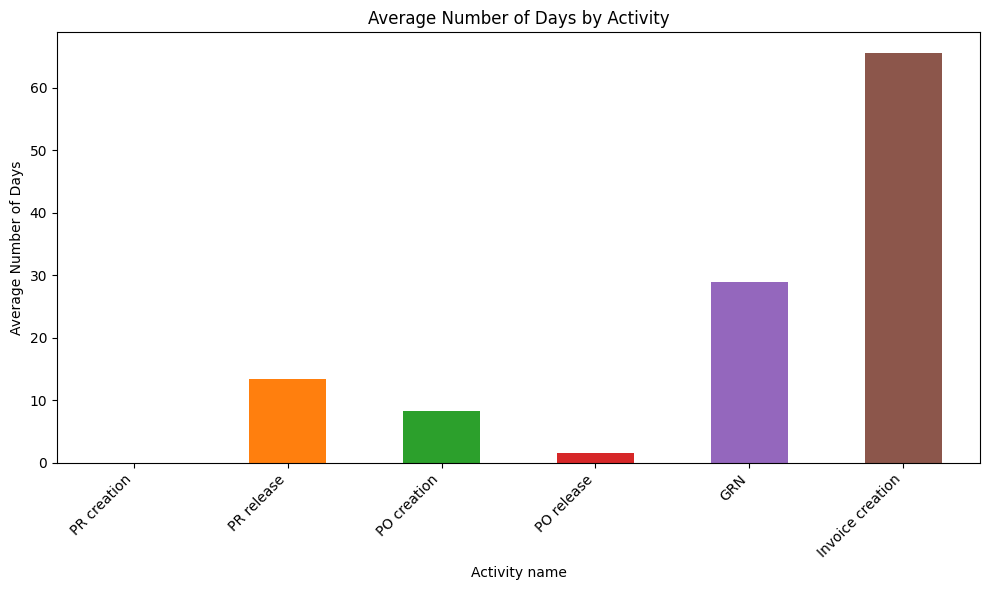

In [333]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data
data = {
    'Activity name': [
        'PR creation', 'PR release', 'PO creation', 'PO release', 'GRN', 'Invoice creation'
    ],
    'Average number of days': [
        0.000000, 13.355926, 8.199647, 1.465825, 28.831813, 65.574966
    ]
}

# Create DataFrame and set index
df = pd.DataFrame(data).set_index('Activity name')

# Plot a colored column chart
ax = df['Average number of days'].plot(
    kind='bar',
    figsize=(10, 6),
    color=plt.cm.tab10.colors  # distinct colors per bar
)

# Labels and layout adjustments
ax.set_ylabel('Average Number of Days')
ax.set_title('Average Number of Days by Activity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [317]:
# for validation 

In [316]:
import pandas as pd

# ─── 1) Parse & normalize all date columns ───────────────────────────────────────
df = final_big_data.copy()
date_cols = [
    "Date of Approval", "Requisition date", "Release Date",
    "RAT Creation date", "RAT Approval date (Actual)", "Pre Award Date",
    "Created On_ekko", "First PO Release Date_PO",
    "posting_date_grn", "Invoice Posting Date", "Entry Date"
]
for c in date_cols:
    df[c] = (
        df[c]
          .astype(str)
          .str.replace("/", "-", regex=False)
          .pipe(pd.to_datetime, errors="coerce")
    )

# ─── 2) Melt → map → dedupe into long‐form events ───────────────────────────────
melted = pd.melt(
    df,
    id_vars=["Purchase Requisition"],
    value_vars=date_cols[:-1],  # drop “Entry Date”
    var_name="raw_event",
    value_name="timestamp"
).dropna(subset=["timestamp"])

event_label_map = {
    "Date of Approval":           "JI creation",
    "Requisition date":           "PR creation",
    "Release Date":               "PR release",
    "RAT Creation date":          "RAT creation",
    "RAT Approval date (Actual)": "RAT approval",
    "Pre Award Date":             "Pre award",
    "Created On_ekko":            "PO creation",
    "First PO Release Date_PO":   "PO release",
    "posting_date_grn":           "GRN",
    "Invoice Posting Date":       "Invoice creation",
}
melted["event"] = melted["raw_event"].map(event_label_map)

deduped = (
    melted.dropna(subset=["event"])
           .sort_values(["Purchase Requisition", "timestamp"])
           .drop_duplicates(["Purchase Requisition", "event"], keep="first")
)

# ─── 3) Classify each PR as happy_path or variation ────────────────────────────
ideal_seq = [
    "JI creation","PR creation","PR release","RAT creation","RAT approval",
    "Pre award","PO creation","PO release","GRN","Invoice creation"
]
raw_fields      = [c for c in df.columns if c not in (["Purchase Requisition"] + date_cols)]
diffs_pr_fields = [c for c in raw_fields if not c.endswith("_PO")]
diffs_po_fields = [c for c in raw_fields if c.endswith("_PO")]

def analyze_case(events_df):
    cid     = events_df.name
    present = [e for e in ideal_seq if e in set(events_df["event"])]

    def find_changes(label, fields, suffix):
        ts = events_df.loc[events_df["event"] == label, "timestamp"]
        if ts.empty:
            return []
        pivot = ts.iat[0]
        rows  = df[df["Purchase Requisition"] == cid]
        pre   = rows[rows["Entry Date"] <= pivot]
        post  = rows[rows["Entry Date"] > pivot]
        if pre.empty or post.empty:
            return []
        b, a = pre.sort_values("Entry Date").iloc[-1], post.sort_values("Entry Date").iloc[0]
        return [
            f"Change in {col}_{suffix}"
            for col in fields
            if b.get(col) != a.get(col)
        ]

    ch_pr = find_changes("PR release", diffs_pr_fields, "PR")
    ch_po = find_changes("PO release", diffs_po_fields, "PO")

    merged = []
    for ev in present:
        merged.append(ev)
        if ev == "PR release":
            merged.extend(ch_pr)
        if ev == "PO release":
            merged.extend(ch_po)

    cls = "happy_path" if (merged == ideal_seq and not ch_pr and not ch_po) else "variation"
    return pd.Series({"sequence": merged, "Classification": cls})

summary = (
    deduped
    .groupby("Purchase Requisition")
    .apply(analyze_case)
    .reset_index()
)

# ─── 4) Build validation sheet (one row per PR) ────────────────────────────────
rows = []
for _, row in summary.iterrows():
    pr = row["Purchase Requisition"]
    cls = row["Classification"]
    seq = row["sequence"]  # list of event names & any change labels

    # look up timestamps for only the IDEAL events in this sequence
    sub = deduped[deduped["Purchase Requisition"] == pr]
    date_entries = []
    for ev in seq:
        if ev.startswith("Change in"):
            continue
        ts = sub.loc[sub["event"] == ev, "timestamp"]
        date_str = ts.iat[0].strftime("%Y-%m-%d") if not ts.empty else ""
        date_entries.append(f'"{ev}":{date_str}')

    rows.append({
        "Classification": cls,
        "PR No":          pr,
        "Sequence w/ dates": "[" + ", ".join(date_entries) + "]"
    })

validation_df = pd.DataFrame(rows)

# ─── 5) Export to Excel ─────────────────────────────────────────────────────────
validation_df.to_excel("validation_sheet.xlsx", index=False)
print(f"validation_sheet.xlsx written with {len(validation_df)} rows.")

C:\Users\HIMANSHU SURYAVANSHI\AppData\Local\Temp\ipykernel_10872\4132609447.py:16: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  .pipe(pd.to_datetime, errors="coerce")
C:\Users\HIMANSHU SURYAVANSHI\AppData\Local\Temp\ipykernel_10872\4132609447.py:16: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  .pipe(pd.to_datetime, errors="coerce")
C:\Users\HIMANSHU SURYAVANSHI\AppData\Local\Temp\ipykernel_10872\4132609447.py:16: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  .pipe(pd.to_datetime, errors="coerce")
C:\Users\HIMANSHU SURYAVANSHI\AppData\Local\Temp\ipykernel_10872\4132609447.py:16: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=Fa

validation_sheet.xlsx written with 2877 rows.
